# References

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2655800/
- https://lena-voita.github.io/nlp_course/language_modeling.html
- https://en.wikipedia.org/wiki/Perplexity
- https://github.com/singnet/language-learning/issues/255
- https://medium.com/mlearning-ai/word-embeddings-wordpiece-and-language-agnostic-bert-labse-98c7626878c7


- https://github.com/natasha/razdel - razdel tries to mimic segmentation of these 4 datasets: SynTagRus, OpenCorpora, GICRYA and RNC. 
- https://www.kaggle.com/c/text-normalization-challenge-english-language
- https://www.kaggle.com/c/text-normalization-challenge-russian-language

# SOTA

- tokenization by ddf+ OR ddf- (forward of backward) [1,2] 0.4 => F1=0.91 on Brown corpus training
- tokenization by ddf+|ddf- (only) [1,2] 0.4 => F1=0.88 on Brown corpus training


In [81]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict 


In [3]:
text = "abc1abc2"

_test_chars = FreedomTokenizer(max_n=2,mode='chars',debug=False).train([text])
print(_test_chars.count_params())
print(_test_chars.model[2])

_test_grams = FreedomTokenizer(max_n=2,mode='grams',debug=False).train([text])
print(_test_grams.count_params())
print(_test_grams.model[2])


30
{'b': {'a': 2}, 'c': {'b': 2}, '1': {'c': 1}, 'a': {'1': 1}, '2': {'c': 1}, 'bc': {'a': 2}, 'c1': {'b': 1}, '1a': {'c': 1}, 'ab': {'1': 1}, 'c2': {'b': 1}}
32
{'b': {'a': 2}, 'c': {'b': 2}, '1': {'c': 1}, 'a': {'1': 1}, '2': {'c': 1}, 'bc': {'a': 1, '1a': 1}, 'c1': {'ab': 1}, '1a': {'bc': 1}, 'ab': {'c1': 1}, 'c2': {'ab': 1}}


In [4]:
to = FreedomTokenizer(max_n=7,debug=False).train(["i like skiing","you love riding","they prefer diving"])
l = profile_freedoms(to.model,"you prefer diving",1,debug=True)


+0-0:	'y'=>y	2	-0-1:	'y'=>y	1
+1-1:	'o'=>o	2	-1-2:	'o'=>o	2
+2-2:	'u'=>u	1	-2-3:	'u'=>u	1
+3-3:	' '=> 	5	-3-4:	' '=> 	5
+4-4:	'p'=>p	1	-4-5:	'p'=>p	1
+5-5:	'r'=>r	3	-5-6:	'r'=>r	3
+6-6:	'e'=>e	4	-6-7:	'e'=>e	5
+7-7:	'f'=>f	1	-7-8:	'f'=>f	1
+8-8:	'e'=>e	4	-8-9:	'e'=>e	5
+9-9:	'r'=>r	3	-9-10:	'r'=>r	3
+10-10:	' '=> 	5	-10-11:	' '=> 	5
+11-11:	'd'=>d	1	-11-12:	'd'=>d	2
+12-12:	'i'=>i	6	-12-13:	'i'=>i	6
+13-13:	'v'=>v	2	-13-14:	'v'=>v	2
+14-14:	'i'=>i	6	-14-15:	'i'=>i	6
+15-15:	'n'=>n	1	-15-16:	'n'=>n	1
+16-16:	'g'=>g	0	-16-17:	'g'=>g	1


In [5]:
# Brown Corpus
# http://www.sls.hawaii.edu/bley-vroman/brown_corpus.html
# http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt

brown_text = url_text("http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt")
print(len(brown_text))

6006249


In [6]:
brown_chars = FreedomTokenizer(max_n=7,mode='chars',debug=False).train([brown_text])
print(brown_chars.count_params())

brown_grams = FreedomTokenizer(max_n=7,mode='grams',debug=False).train([brown_text])
print(brown_grams.count_params())

brown_chars.store('data/models/brown_nolines_chars_7a')
brown_grams.store('data/models/brown_nolines_grams_7a')


10967135
33960499


['tuna', ' ', 'is', ' ', 'a', ' ', 'fish', '.', ' ', 'cat', ' ', 'is', ' ', 'a', ' ', 'mammal', '.', ' ', 'eagle', ' ', 'is', ' ', 'a', ' ', 'bird', '.', ' ', "that's", ' ', 'it', '.']


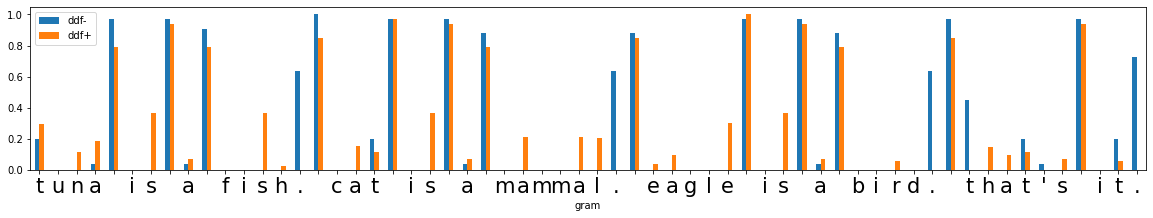

In [8]:
text = "tuna is a fish. cat is a mammal. eagle is a bird. that's it." 
tokens = tokenize_with_opposite_metrics(brown_chars.model,text.lower(),'ddf-','ddf+',[1,2])
print(tokens)

df = profile_freedoms_avg_df(brown_chars.model,text.lower(),['f-','f+','ddf-','ddf+','ddf+|ddf-'],[1,2])
plot_bars(df,'gram',['ddf-','ddf+'])


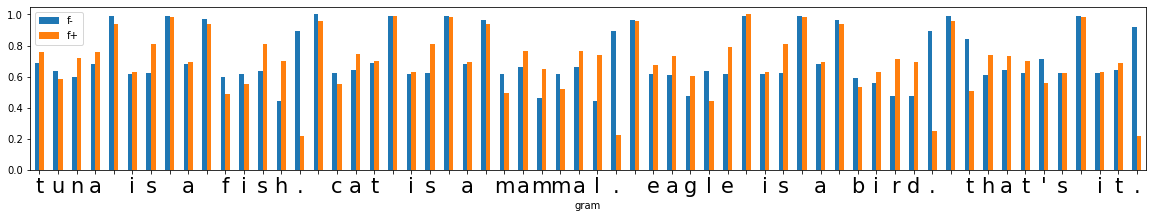

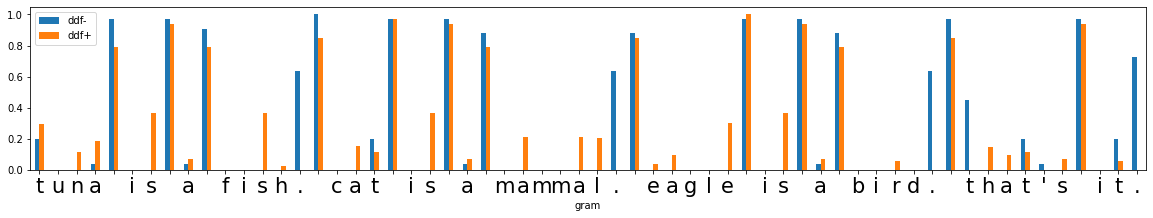

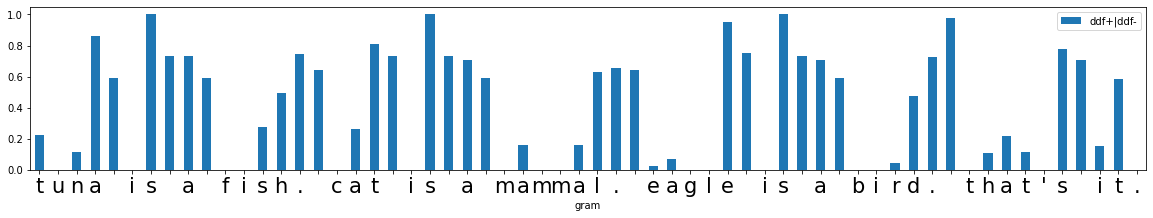

In [9]:
text = "tuna is a fish. cat is a mammal. eagle is a bird. that's it." 
df = profile_freedoms_avg_df(brown_chars.model,text.lower(),['f-','f+','ddf-','ddf+','ddf+|ddf-'],[1,2])
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])
plot_bars(df,'gram',['ddf+|ddf-'])


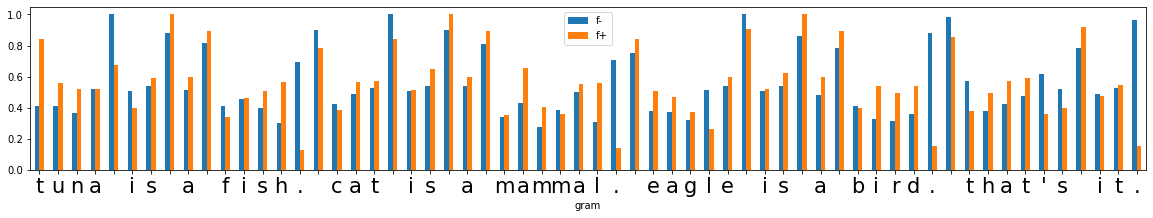

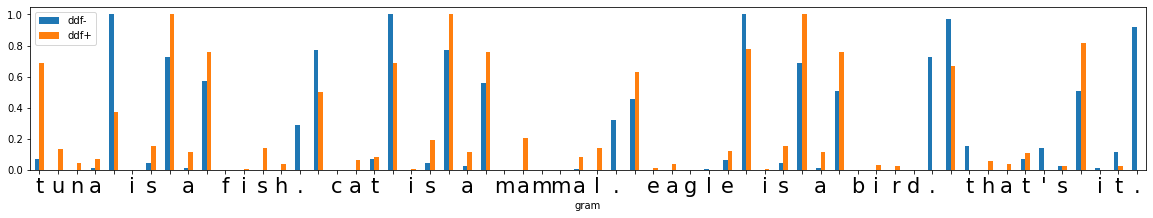

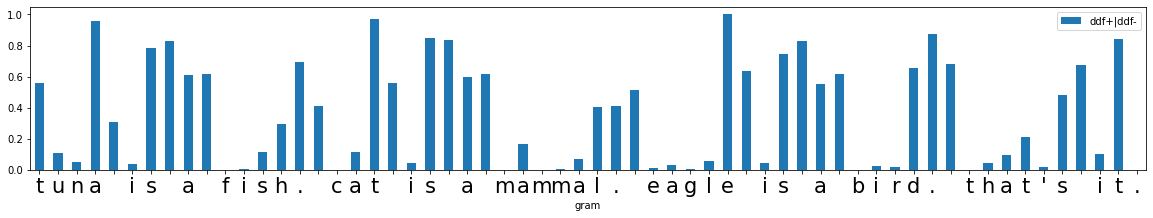

In [10]:
text = "tuna is a fish. cat is a mammal. eagle is a bird. that's it." 
df = profile_freedoms_avg_df(brown_chars.model,text.lower(),['f-','f+','ddf-','ddf+','ddf+|ddf-'],[1,2,3,4])
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])
plot_bars(df,'gram',['ddf+|ddf-'])


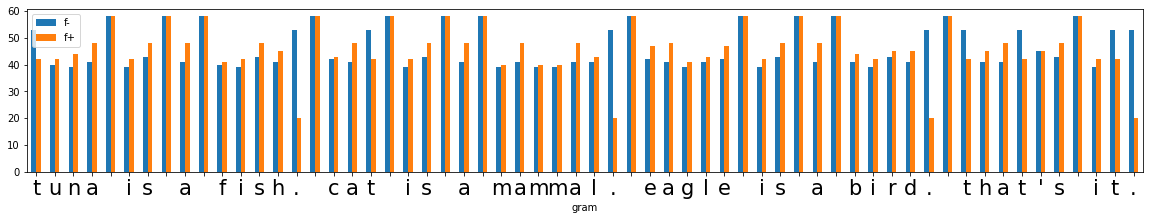

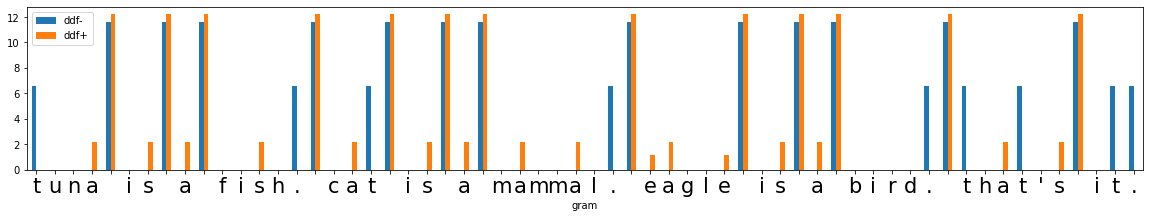

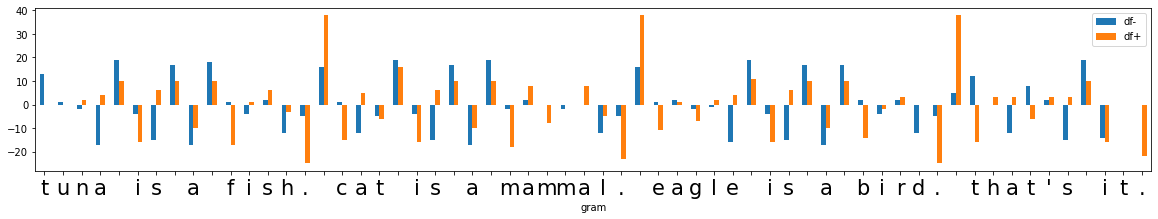

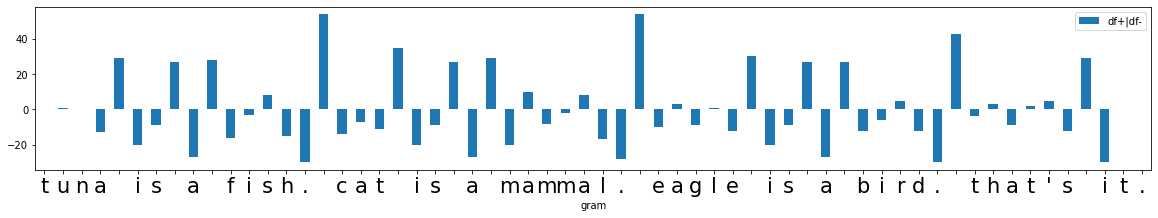

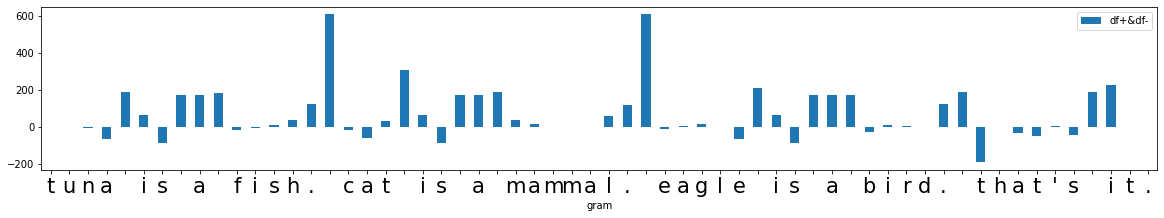

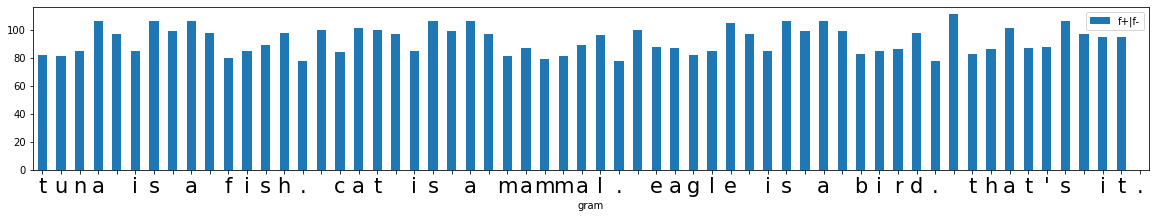

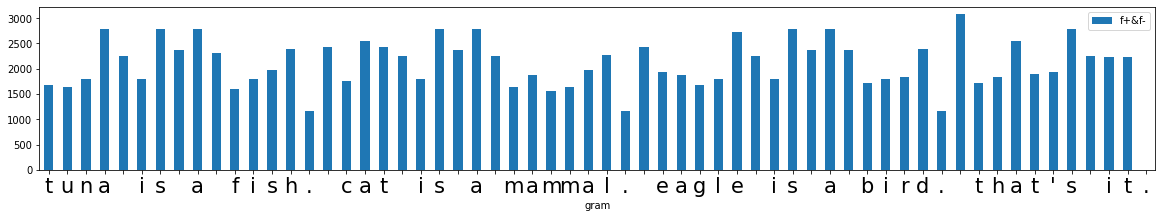

In [11]:
text = "tuna is a fish. cat is a mammal. eagle is a bird. that's it." 
df = profile_freedoms_ex_df(brown_chars.model,text.lower(),1)
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])
plot_bars(df,'gram',['df-','df+'])
plot_bars(df,'gram',['df+|df-'])
plot_bars(df,'gram',['df+&df-'])
plot_bars(df,'gram',['f+|f-'])
plot_bars(df,'gram',['f+&f-'])


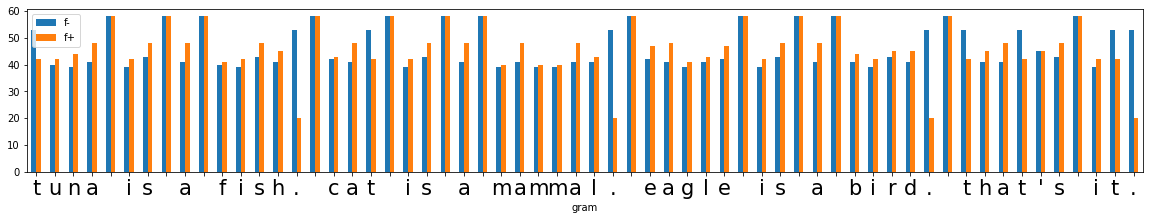

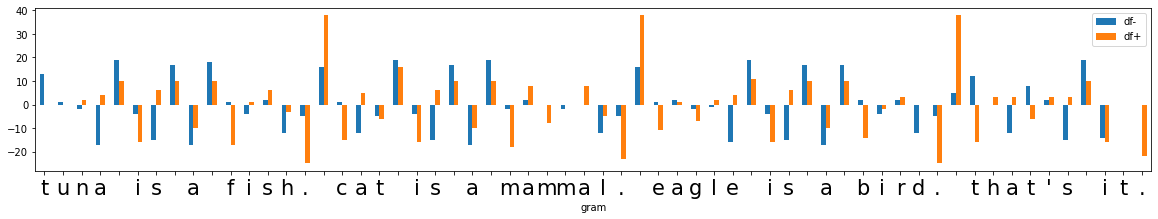

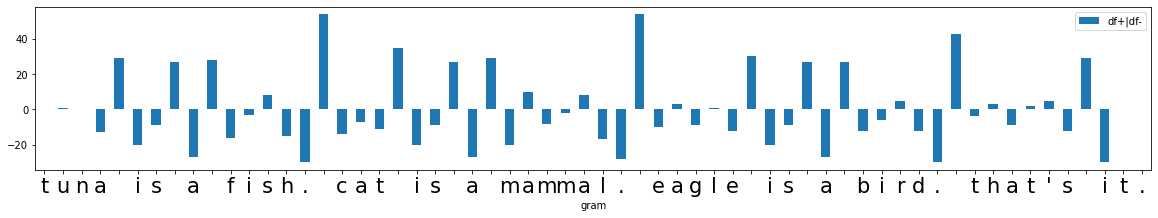

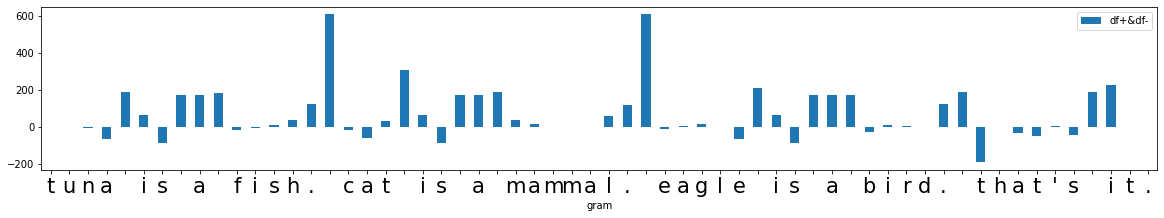

In [12]:
text = "tuna is a fish. cat is a mammal. eagle is a bird. that's it." 
df = profile_freedoms_ex_df(brown_grams.model,text.lower(),1)
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['df-','df+'])
plot_bars(df,'gram',['df+|df-'])
plot_bars(df,'gram',['df+&df-'])

/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


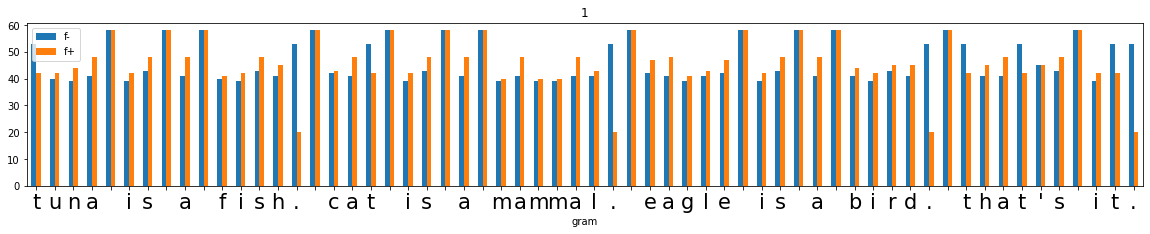

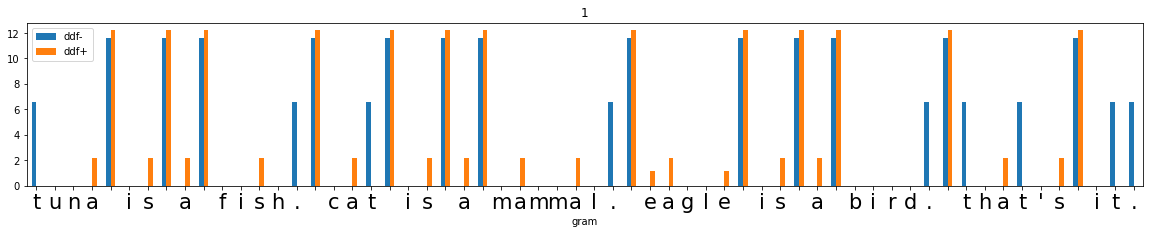

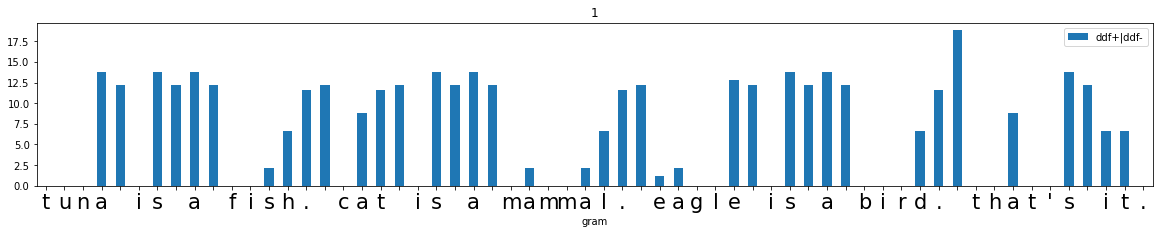

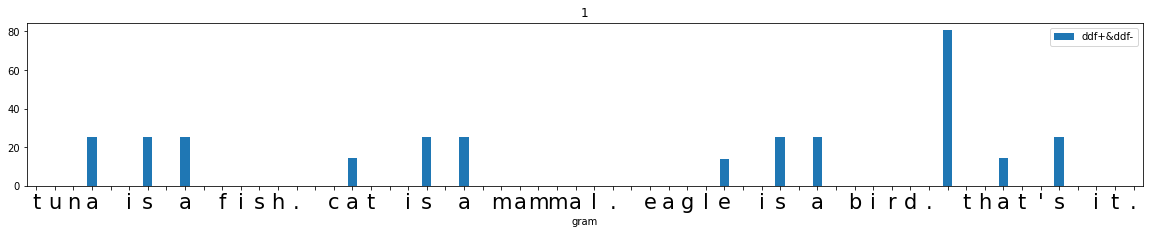

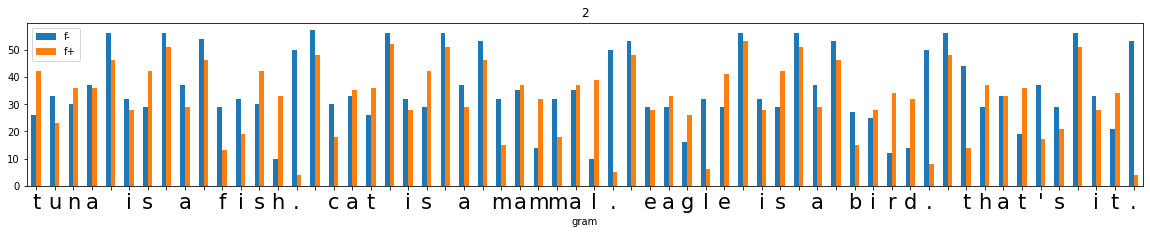

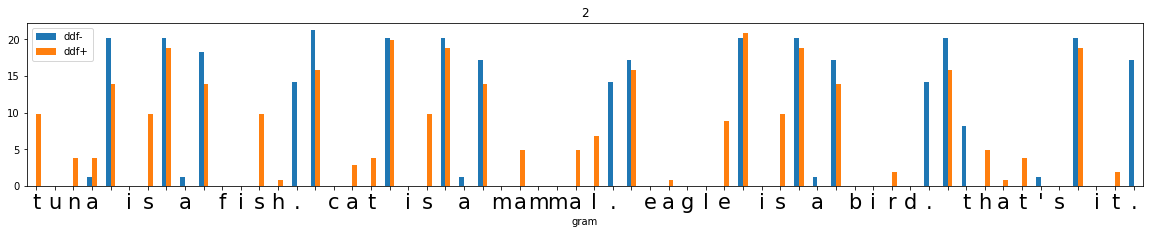

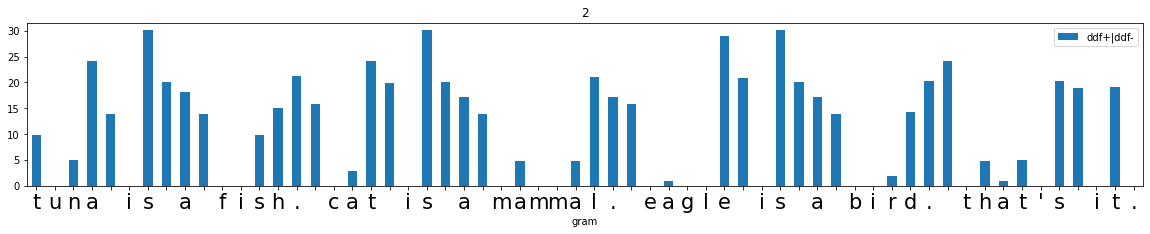

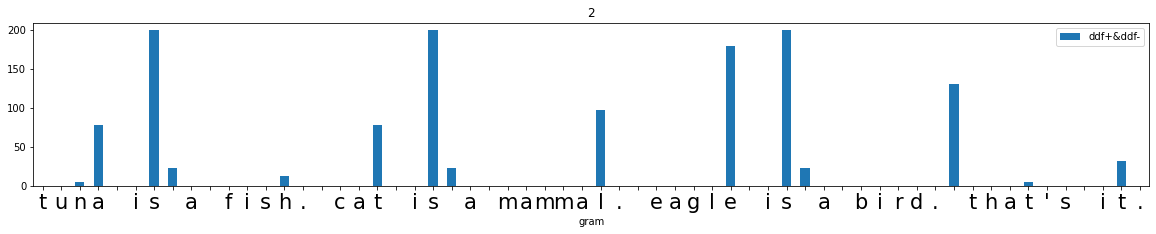

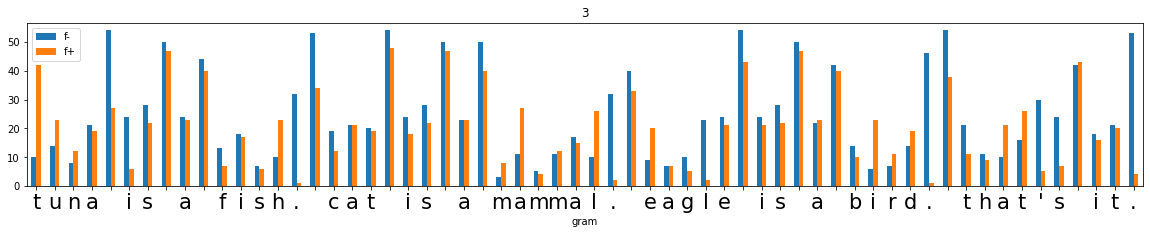

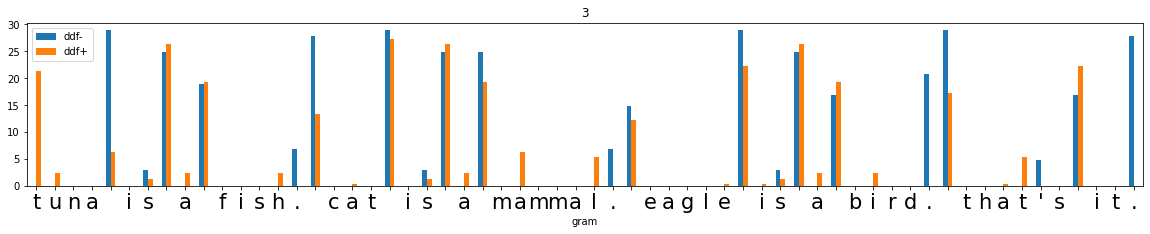

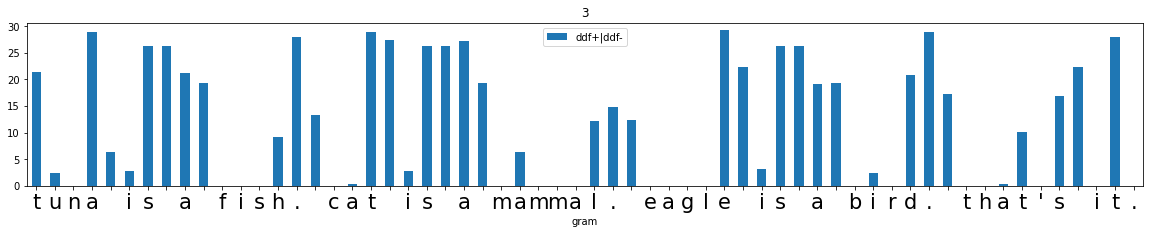

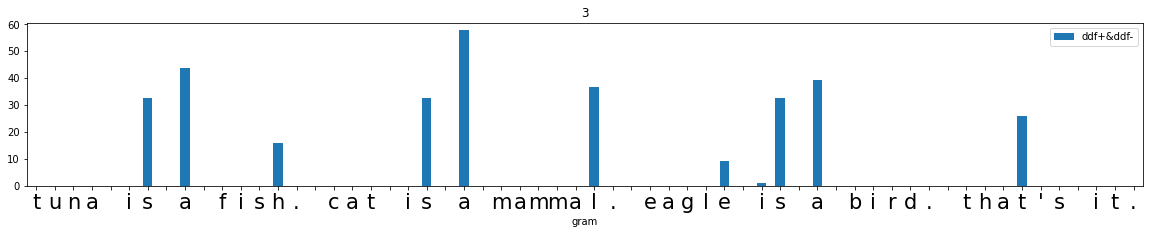

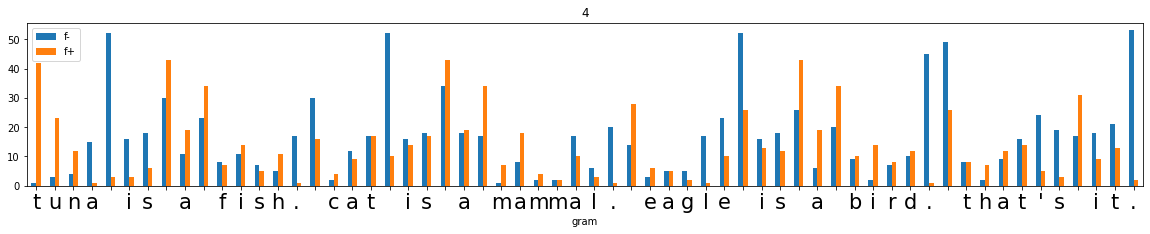

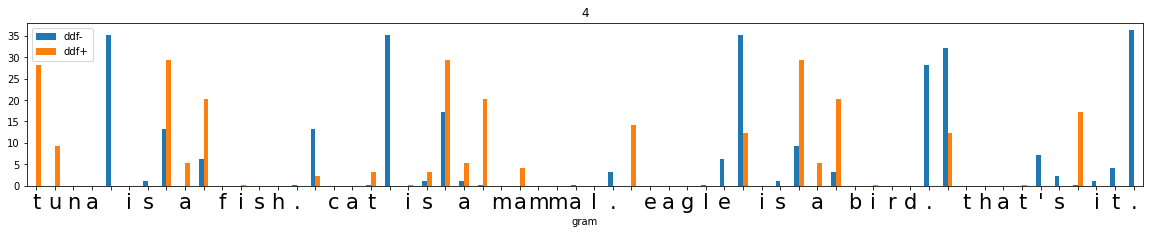

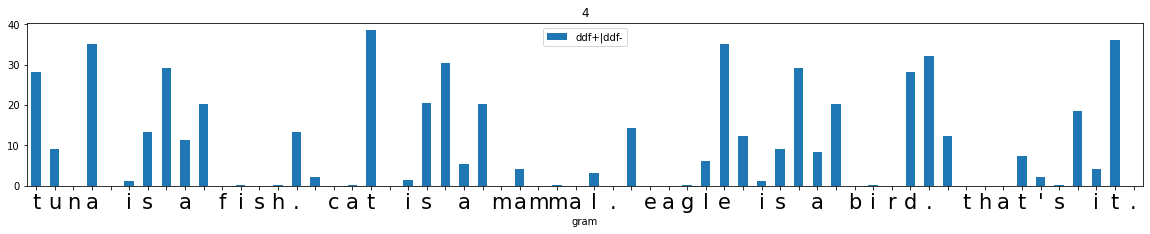

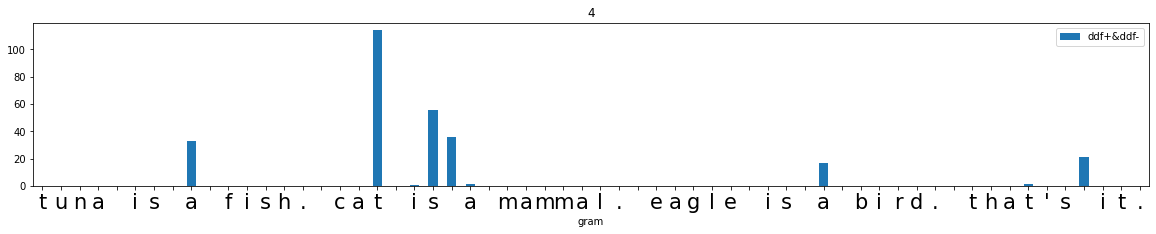

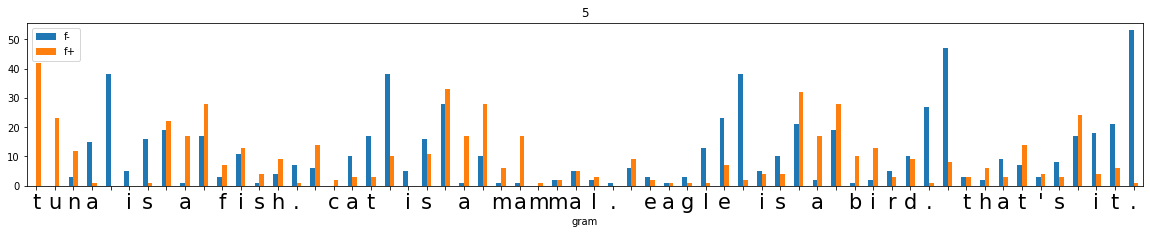

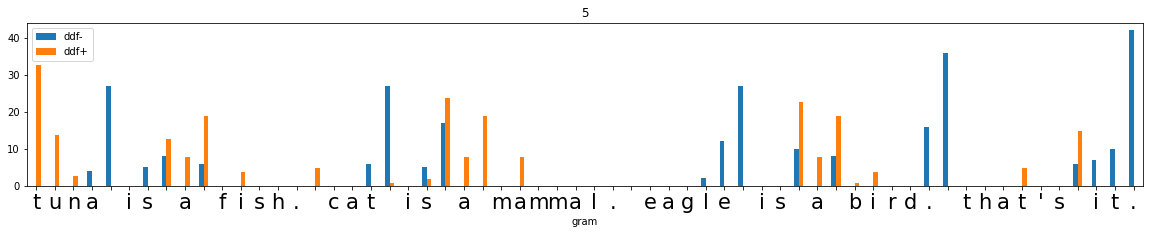

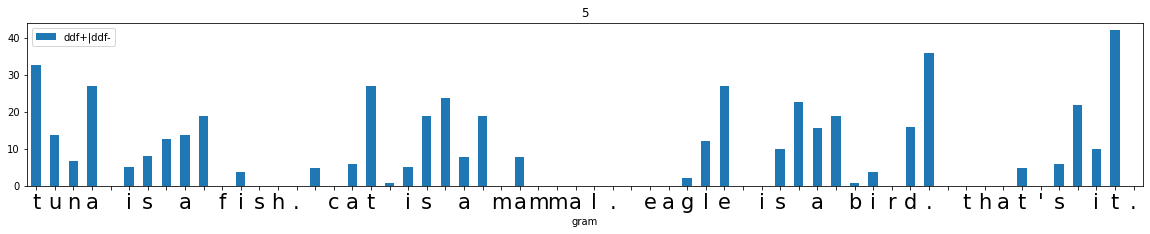

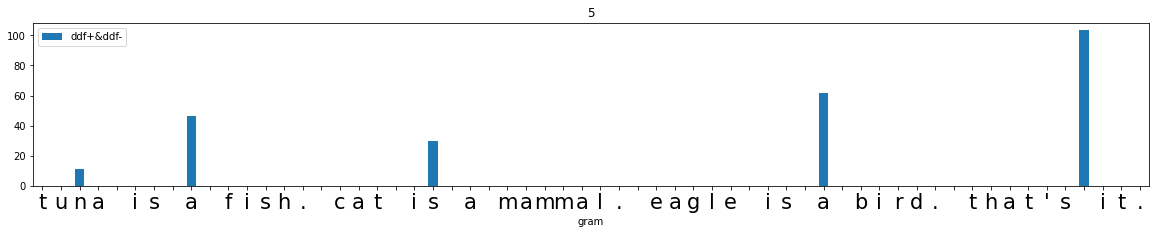

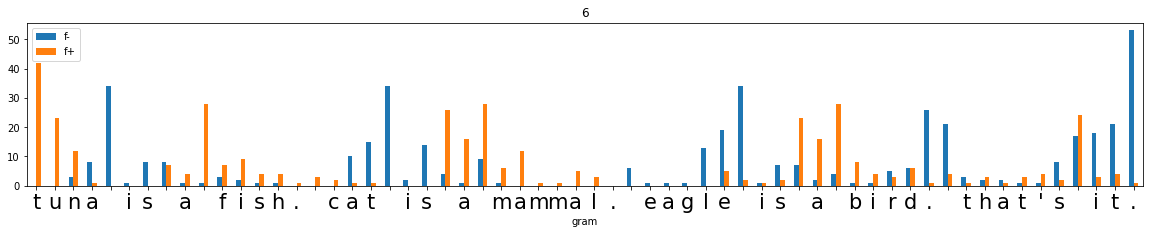

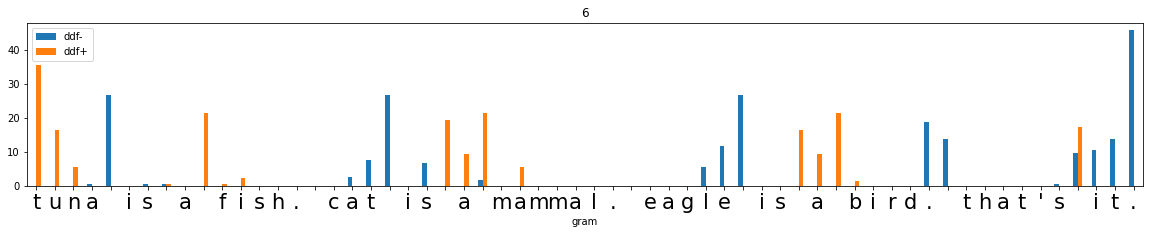

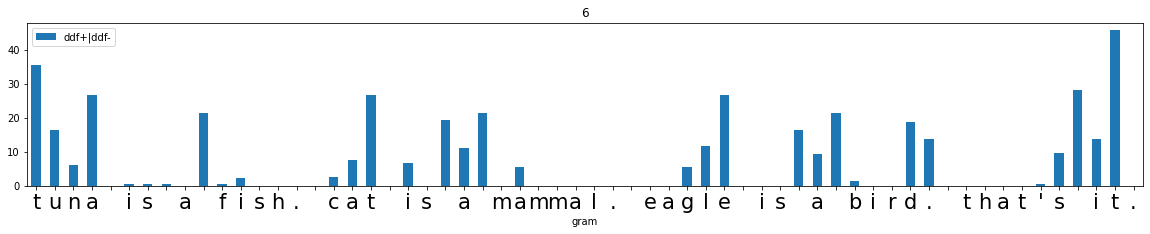

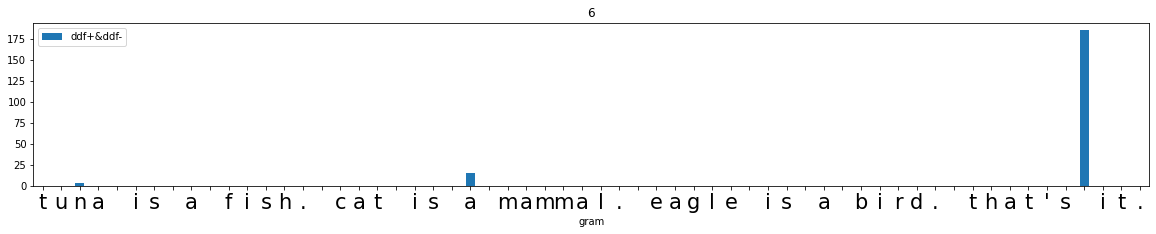

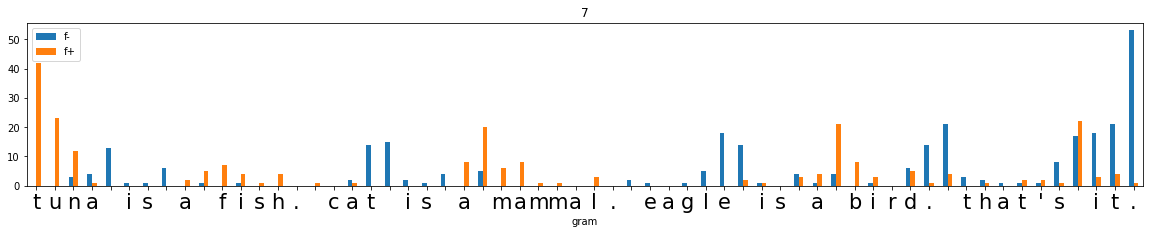

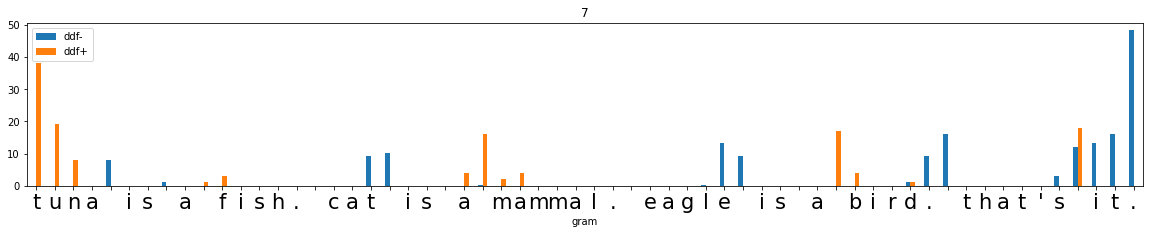

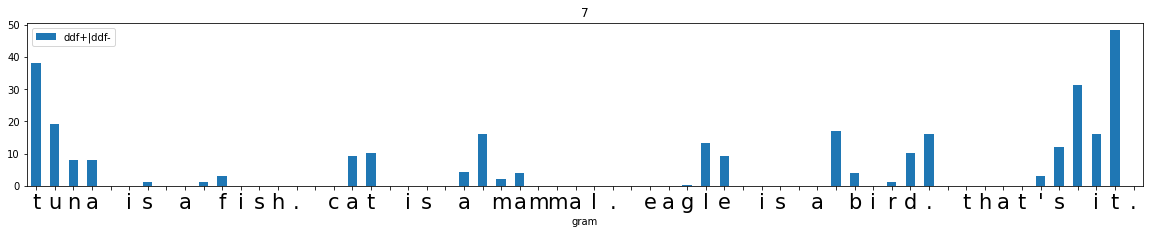

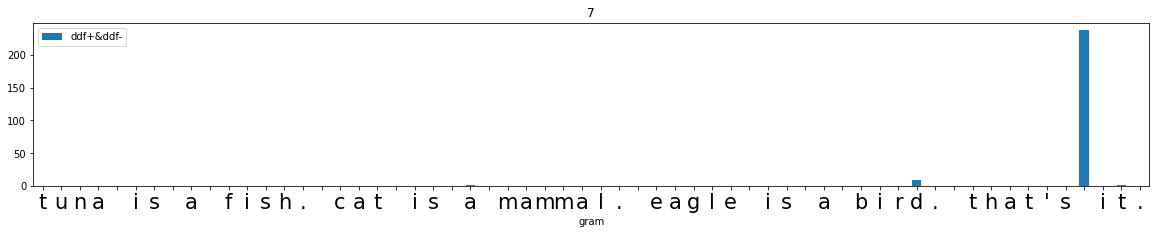

In [13]:
for i in range(1,7+1):
    df = profile_freedoms_ex_df(brown_chars.model,text.lower(),i)
    plot_bars(df,'gram',['f-','f+'],title=str(i))
    plot_bars(df,'gram',['ddf-','ddf+'],title=str(i))
    plot_bars(df,'gram',['ddf+|ddf-'],title=str(i))
    plot_bars(df,'gram',['ddf+&ddf-'],title=str(i))
    #plot_bars(df,'gram',['df-','df+'],title=str(i))
    #plot_bars(df,'gram',['df+|df-'],title=str(i))
    #plot_bars(df,'gram',['df+&df-'],title=str(i))
    #plot_bars(df,'gram',['peak-','peak+'],title=str(i))
    #plot_bars(df,'gram',['f+|f-'],title=str(i))
    #plot_bars(df,'gram',['f+&f-'],title=str(i))


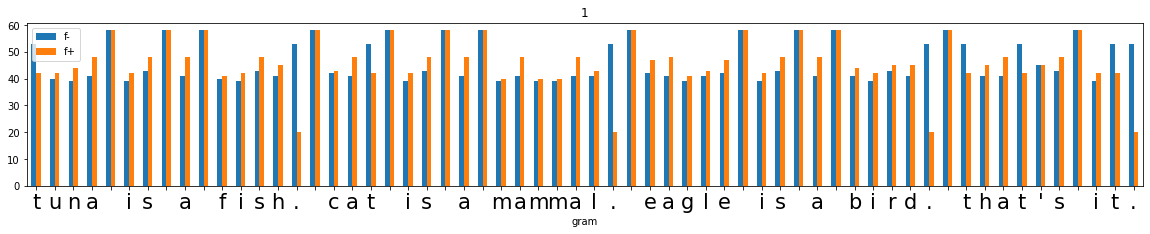

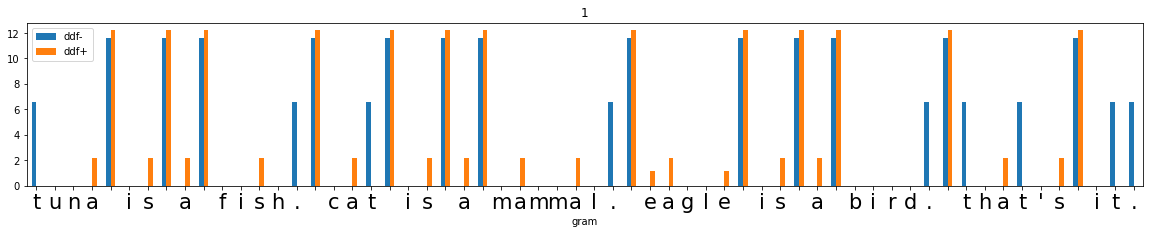

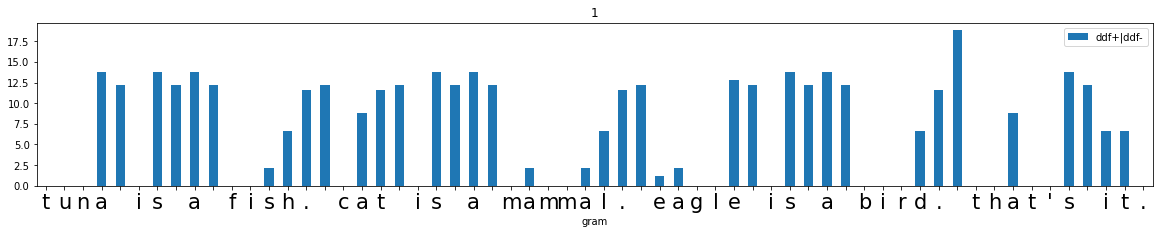

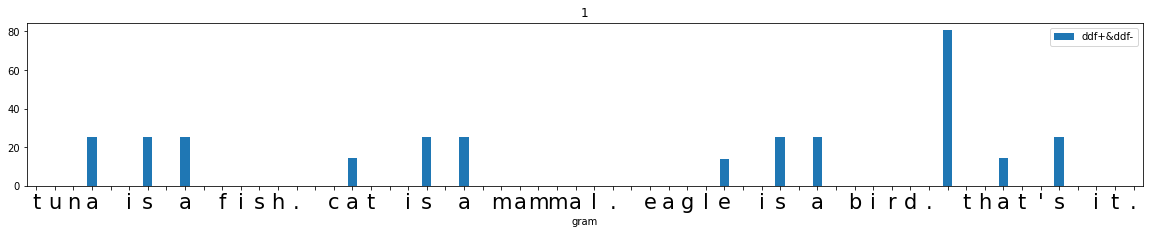

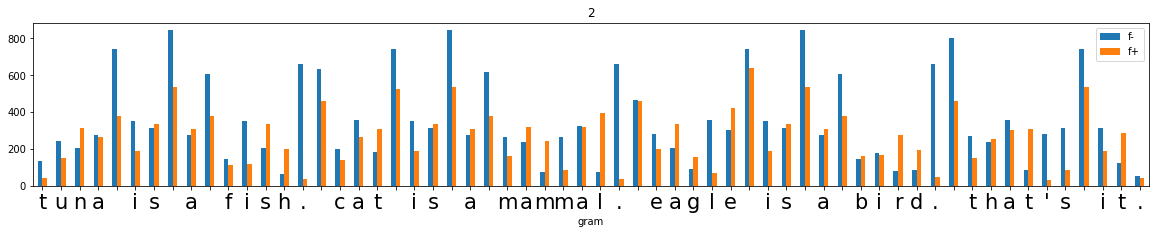

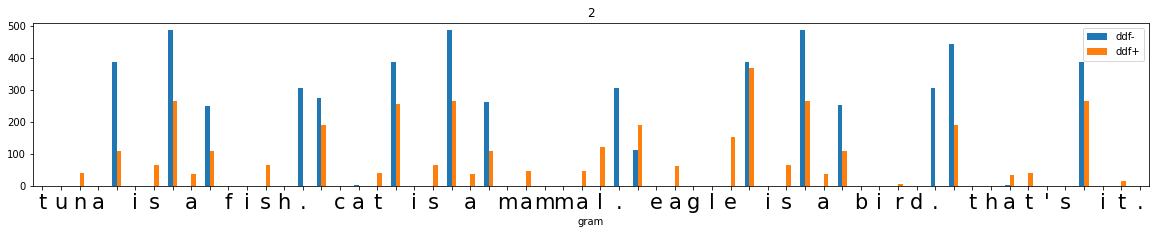

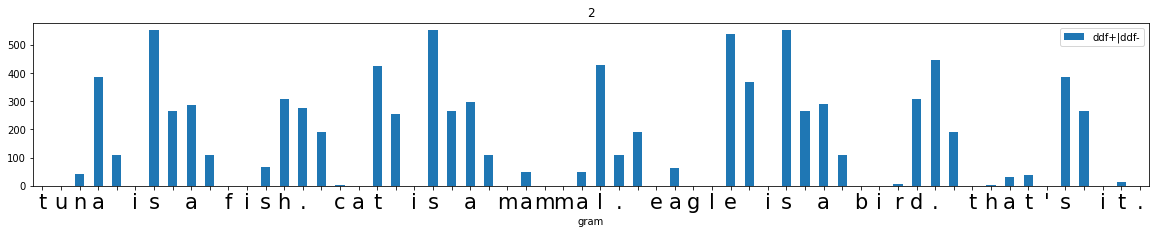

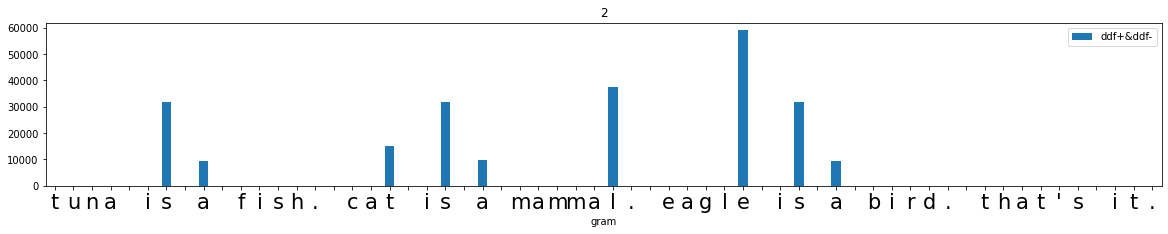

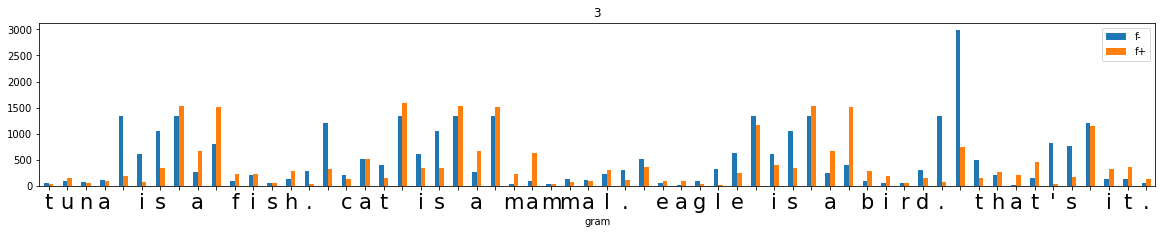

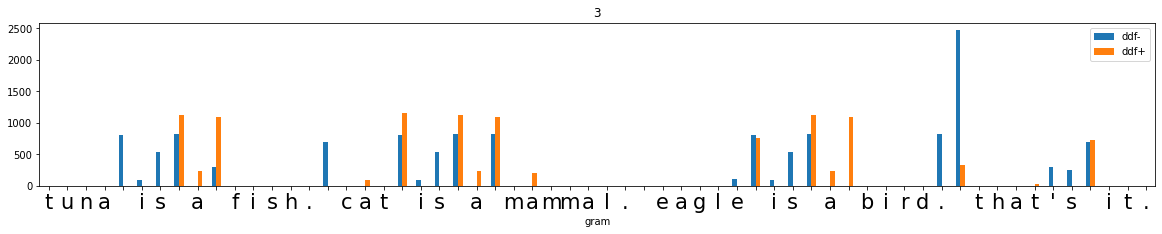

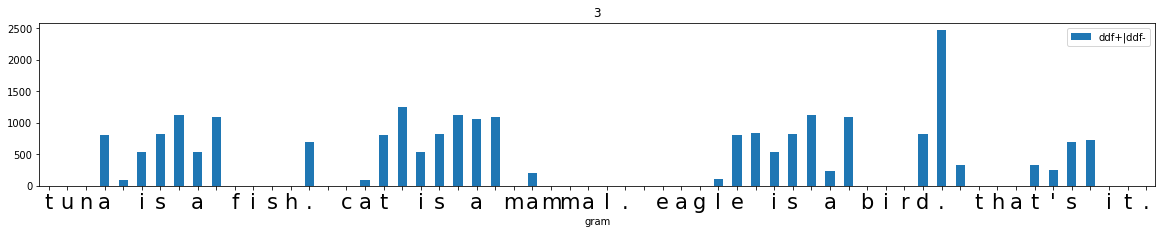

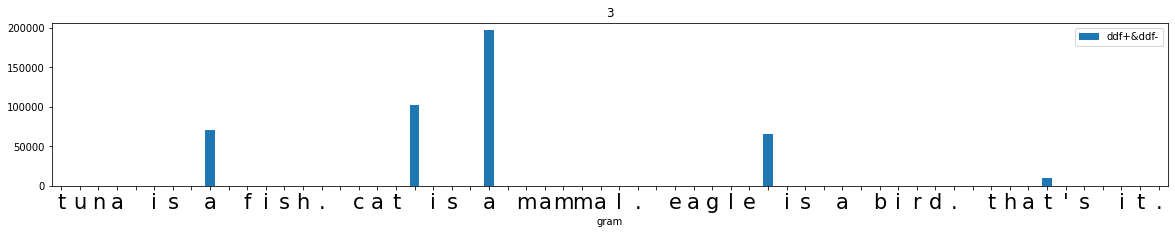

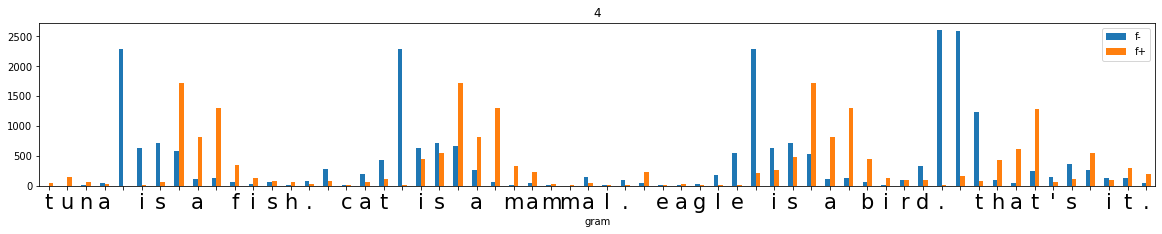

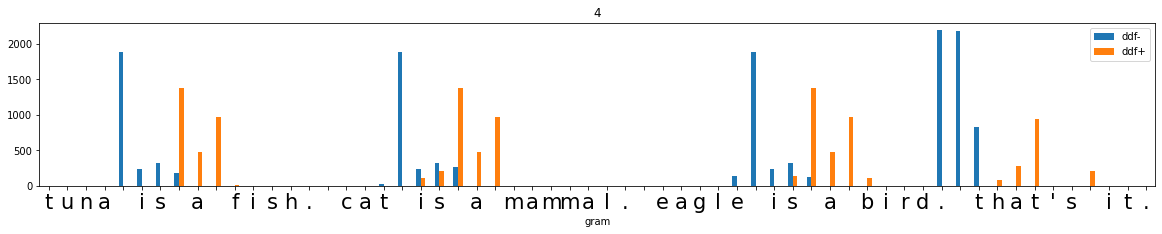

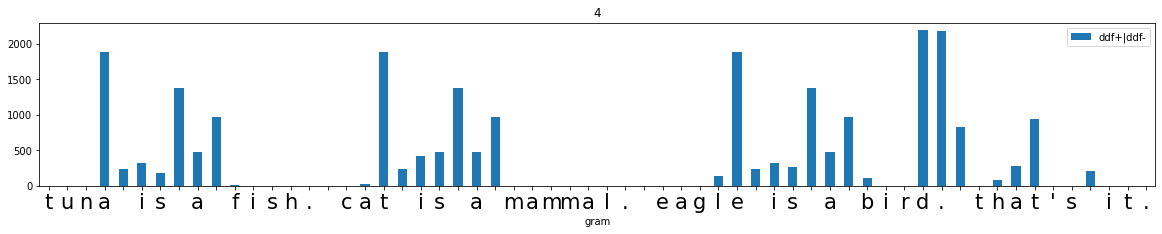

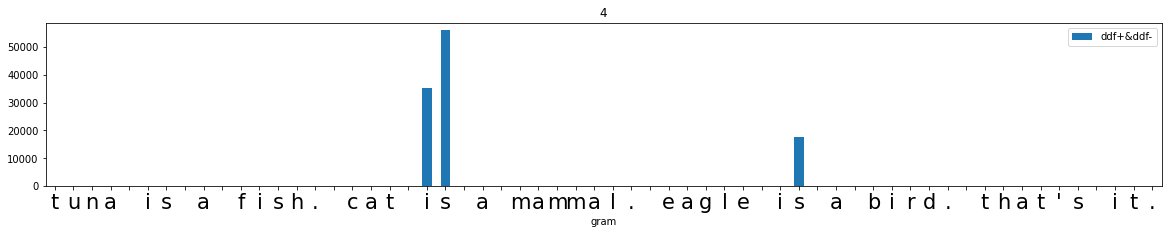

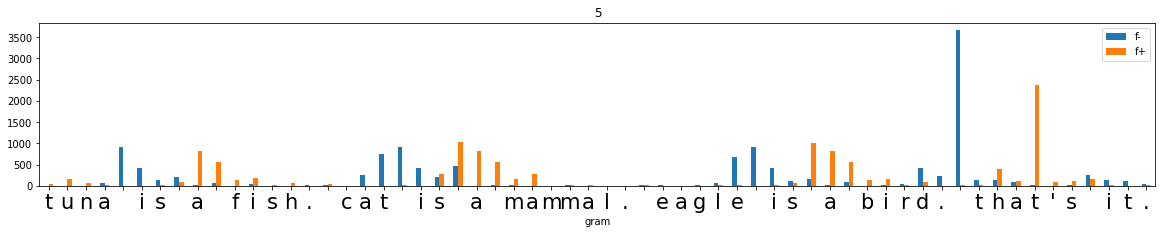

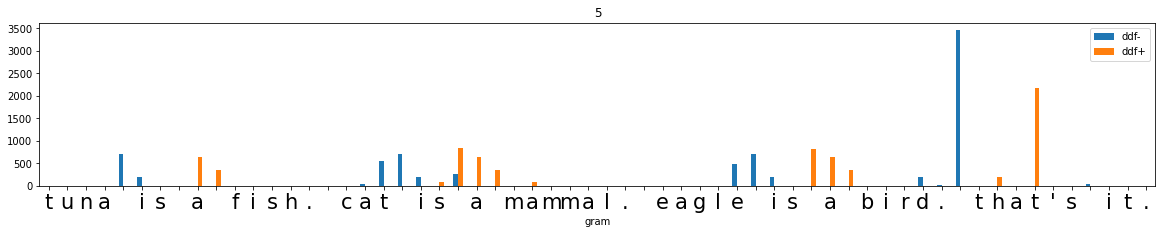

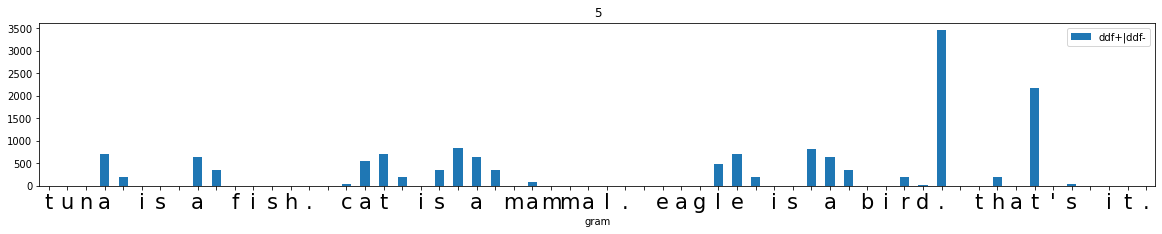

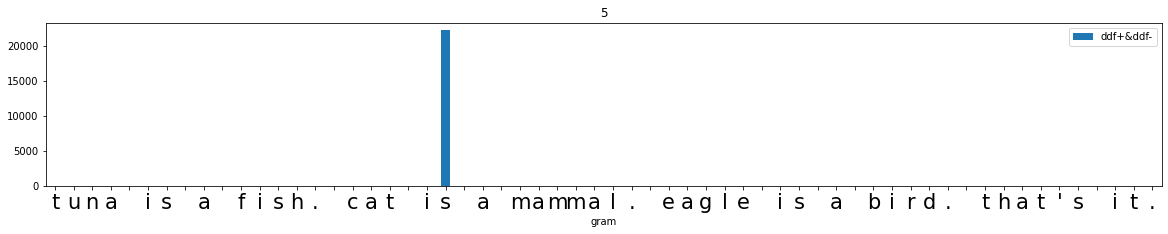

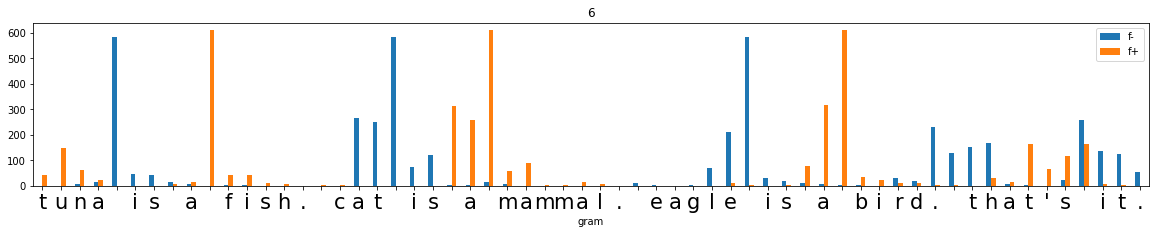

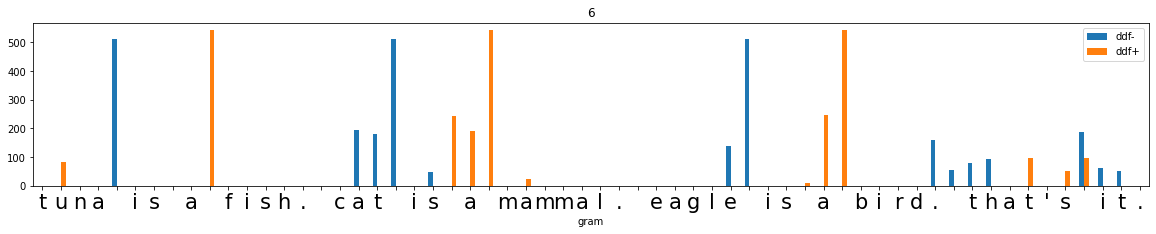

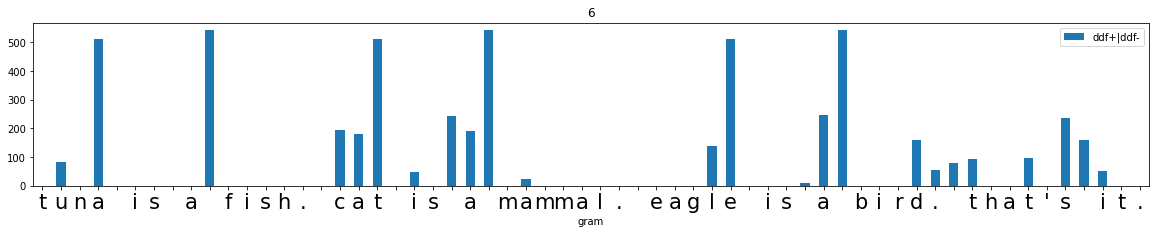

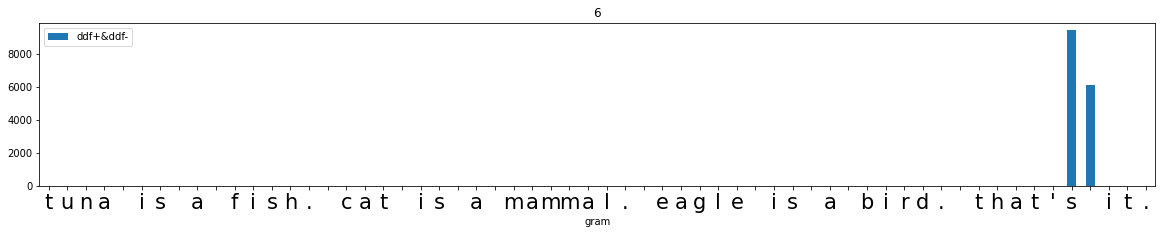

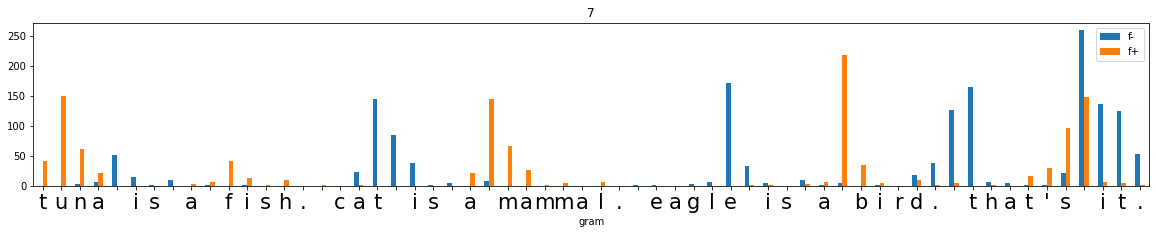

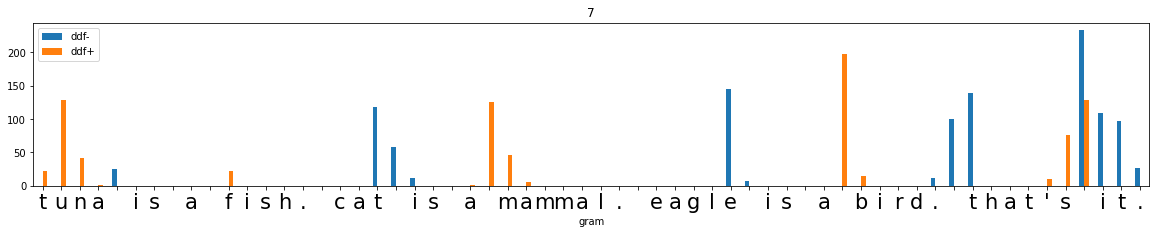

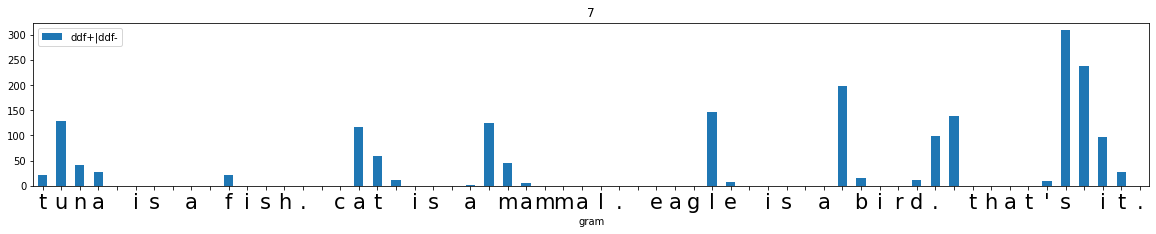

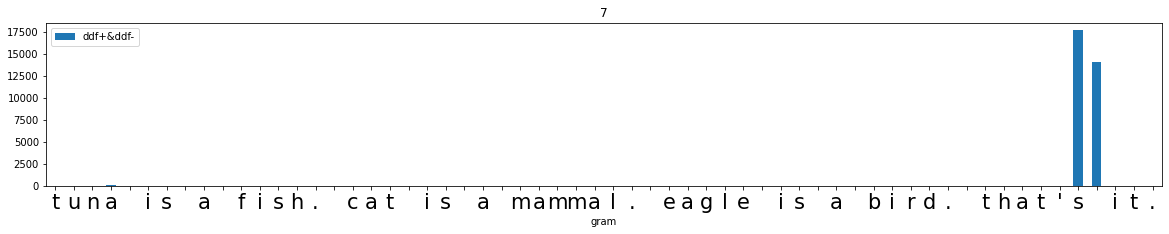

In [14]:
for i in range(1,7+1):
    df = profile_freedoms_ex_df(brown_grams.model,text.lower(),i)
    plot_bars(df,'gram',['f-','f+'],title=str(i))
    plot_bars(df,'gram',['ddf-','ddf+'],title=str(i))
    plot_bars(df,'gram',['ddf+|ddf-'],title=str(i))
    plot_bars(df,'gram',['ddf+&ddf-'],title=str(i))
    #plot_bars(df,'gram',['df-','df+'],title=str(i))
    #plot_bars(df,'gram',['df+|df-'],title=str(i))
    #plot_bars(df,'gram',['df+&df-'],title=str(i))
    #plot_bars(df,'gram',['peak-','peak+'],title=str(i))
    #plot_bars(df,'gram',['f+|f-'],title=str(i))
    #plot_bars(df,'gram',['f+&f-'],title=str(i))


In [15]:
brown_chars1 = FreedomTokenizer(max_n=7,name='data/models/brown_nolines_chars_7a',mode='chars',debug=False)
print(brown_chars.count_params())


10967135


In [34]:
brown_text_lines = url_text_lines("http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt")
print(len(brown_text_lines))


19810


In [35]:
test_texts = text_lines_sample(brown_text_lines,10,[" ","#"])


In [30]:
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)


N	thres.	F1
[1]	0.2	0.59
[1]	0.3	0.62
[1]	0.4	0.57
[1]	0.5	0.56
[1]	0.6	0.56
[1]	0.7	0.78
[1]	0.8	0.78
[1, 2]	0.2	0.4
[1, 2]	0.3	0.61
[1, 2]	0.4	0.91
[1, 2]	0.5	0.9
[1, 2]	0.6	0.79
[1, 2]	0.7	0.72
[1, 2]	0.8	0.67
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.78
[2, 3]	0.5	0.75
[2, 3]	0.6	0.65
[2, 3]	0.7	0.43
[2, 3]	0.8	0.2
[1, 2, 3]	0.2	0.56
[1, 2, 3]	0.3	0.79
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.85
[1, 2, 3]	0.6	0.7
[1, 2, 3]	0.7	0.55
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.69
[1, 2, 3, 4]	0.3	0.82
[1, 2, 3, 4]	0.4	0.78
[1, 2, 3, 4]	0.5	0.7
[1, 2, 3, 4]	0.6	0.51
[1, 2, 3, 4]	0.7	0.25
[1, 2, 3, 4]	0.8	0.11


In [31]:
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)


N	thres.	F1
[1]	0.2	0.59
[1]	0.3	0.62
[1]	0.4	0.57
[1]	0.5	0.56
[1]	0.6	0.56
[1]	0.7	0.78
[1]	0.8	0.78
[1, 2]	0.2	0.38
[1, 2]	0.3	0.46
[1, 2]	0.4	0.46
[1, 2]	0.5	0.53
[1, 2]	0.6	0.48
[1, 2]	0.7	0.28
[1, 2]	0.8	0.05
[2, 3]	0.2	0.53
[2, 3]	0.3	0.38
[2, 3]	0.4	0.24
[2, 3]	0.5	0.11
[2, 3]	0.6	0.05
[2, 3]	0.7	0.03
[2, 3]	0.8	0.02
[1, 2, 3]	0.2	0.53
[1, 2, 3]	0.3	0.39
[1, 2, 3]	0.4	0.24
[1, 2, 3]	0.5	0.11
[1, 2, 3]	0.6	0.05
[1, 2, 3]	0.7	0.03
[1, 2, 3]	0.8	0.02
[1, 2, 3, 4]	0.2	0.29
[1, 2, 3, 4]	0.3	0.17
[1, 2, 3, 4]	0.4	0.09
[1, 2, 3, 4]	0.5	0.03
[1, 2, 3, 4]	0.6	0.02
[1, 2, 3, 4]	0.7	0.02
[1, 2, 3, 4]	0.8	0.01


In [32]:
# just use one parameter 
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False)


N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.57
[1]	0.4	0.7
[1]	0.5	0.37
[1]	0.6	0.15
[1]	0.7	0.07
[1]	0.8	0.0
[1, 2]	0.2	0.71
[1, 2]	0.3	0.85
[1, 2]	0.4	0.88
[1, 2]	0.5	0.66
[1, 2]	0.6	0.26
[1, 2]	0.7	0.06
[1, 2]	0.8	0.01
[2, 3]	0.2	0.7
[2, 3]	0.3	0.78
[2, 3]	0.4	0.66
[2, 3]	0.5	0.4
[2, 3]	0.6	0.13
[2, 3]	0.7	0.03
[2, 3]	0.8	0.01
[1, 2, 3]	0.2	0.75
[1, 2, 3]	0.3	0.87
[1, 2, 3]	0.4	0.75
[1, 2, 3]	0.5	0.43
[1, 2, 3]	0.6	0.16
[1, 2, 3]	0.7	0.05
[1, 2, 3]	0.8	0.0
[1, 2, 3, 4]	0.2	0.78
[1, 2, 3, 4]	0.3	0.82
[1, 2, 3, 4]	0.4	0.68
[1, 2, 3, 4]	0.5	0.42
[1, 2, 3, 4]	0.6	0.16
[1, 2, 3, 4]	0.7	0.04
[1, 2, 3, 4]	0.8	0.01


In [34]:
evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',[1,2],0.4,spaces=False,debug=True)

0.8333333333333333
the fulton county grand jury said friday an investigation of atlanta's recent primary election produced "no evidence" that any irregularities took place.    
{'evidence"': 1, 'evidence': -1, 'no': -1, '. ': 1, '"': -2, '"no': 1, '.': -1}
['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '"', 'no', 'evidence', '"', 'that', 'any', 'irregularities', 'took', 'place', '.']
['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '"no', 'evidence"', 'that', 'any', 'irregularities', 'took', 'place', '. ']

0.9130434782608695
mrs& blanche dunkel, 60, who has spent 25 years in the dwight reformatory for women for the murder in 1935 of her son-in-law, ervin lang, then 28, appealed for a parole at a hearing yesterday before two illinois pardon and parole board members, john m& bookwalter 

0.9357142857142857
i should like to underline four points i made in my first report with respect to vocational education. first and foremost, vocational courses should not replace courses which are essential parts of the required academic program for graduation. second, vocational courses should be provided in grades 11 and 12 and not require more than half the student's time in those years; however, for slow learners and prospective dropouts these courses ought to begin earlier. third, the significance of the vocational courses is that those enrolled are keenly interested in the work; they realize the relevance of what they are learning to their future careers, and this sense of purpose is carried over to the academic courses which they are studying at the same time. fourth, the type of vocational training programs should be related to the employment opportunities in the general locality. this last point is important because if high school pupils are aware that few, if any, graduates 

0.9078014184397163
they held the funeral the next morning from the crossroads church and buried the little box in the quiet family plot. kate moved through all the preparations and services in a state of bewilderment. she would not accept the death of such a little child. "god called her to him", the minister had said. god would not <do> that, kate thought stubbornly.    
{'"god': 1, '"': -2, 'dea': 1, '.': -1, 'th': 1, ' in': 1, '. ': 1, 'him"': 1, 'in': -1, 'him': -1, 'death': -1, 'god': -1}
['they', 'held', 'the', 'funeral', 'the', 'next', 'morning', 'from', 'the', 'crossroads', 'church', 'and', 'buried', 'the', 'little', 'box', 'in', 'the', 'quiet', 'family', 'plot', '.', 'kate', 'moved', 'through', 'all', 'the', 'preparations', 'and', 'services', 'in', 'a', 'state', 'of', 'bewilderment', '.', 'she', 'would', 'not', 'accept', 'the', 'death', 'of', 'such', 'a', 'little', 'child', '.', '"', 'god', 'called', 'her', 'to', 'him', '"', ',', 'the', 'minister', 'had', 'said', '.', 'god', '

In [35]:
text = 'the fulton county grand jury said friday an investigation of atlanta\'s recent primary election produced "no evidence" that any irregularities took place. '
tokens = tokenize_with_opposite_metrics(brown_chars.model,text,'ddf-','ddf+',[1,2],debug=True)
print(str(tokens))

t			0.53	0.3	t
h			0.0	0.14	th
e	-		0.0	0.18	the
 		+	0.9	1.0	 
f			0.0	0.0	f
u			0.0	0.0	fu
l			0.0	0.11	ful
t			0.21	0.0	fult
o			0.14	0.15	fulto
n	-		0.0	0.33	fulton
 		+	0.98	0.97	 
c			0.06	0.0	c
o			0.06	0.24	co
u			0.06	0.08	cou
n			0.0	0.11	coun
t			0.21	0.11	count
y	-		0.0	0.0	county
 		+	0.88	0.82	 
g			0.0	0.0	g
r			0.08	0.0	gr
a			0.08	0.24	gra
n			0.0	0.3	gran
d	-		0.0	0.21	grand
 		+	0.73	1.0	 
j			0.0	0.0	j
u			0.0	0.0	ju
r			0.0	0.11	jur
y	-		0.0	0.08	jury
 		+	0.88	0.82	 
s			0.0	0.06	s
a			0.0	0.09	sa
i			0.0	0.0	sai
d	-		0.0	0.0	said
 		+	0.9	1.0	 
f			0.0	0.0	f
r			0.01	0.0	fr
i			0.0	0.05	fri
d			0.06	0.0	frid
a			0.0	0.15	frida
y	-		0.0	0.02	friday
 		+	0.95	0.82	 
a			0.08	0.06	a
n	-		0.0	0.3	an
 		+	0.95	0.97	 
i			0.15	0.0	i
n			0.0	0.33	in
v			0.0	0.0	inv
e			0.08	0.27	inve
s			0.08	0.33	inves
t			0.21	0.14	invest
i			0.0	0.0	investi
g			0.0	0.0	investig
a			0.06	0.06	investiga
t			0.21	0.11	investigat
i			0.0	0.0	investigati
o			0.14	0.03	investigatio
n	-		0.

In [36]:
print(len(brown_chars.model[1]['"']),len(brown_chars.model[2]['"']))
brown_chars.model[1]['"']


51 53


{'n': 351,
 ' ': 1767,
 'd': 315,
 'i': 1246,
 'o': 323,
 ',': 2030,
 'c': 313,
 '.': 3374,
 'a': 618,
 't': 1042,
 'p': 315,
 'h': 402,
 'w': 804,
 'f': 241,
 'q': 17,
 'e': 147,
 'g': 200,
 'b': 376,
 's': 542,
 'y': 398,
 'm': 334,
 '#': 12,
 '?': 915,
 'u': 79,
 'v': 52,
 'l': 230,
 '-': 185,
 '!': 350,
 'r': 174,
 'k': 40,
 'j': 80,
 '~': 43,
 ')': 39,
 'x': 1,
 ';': 54,
 '7': 1,
 '<': 55,
 '*': 41,
 ':': 11,
 '(': 3,
 ']': 2,
 '"': 7,
 '}': 6,
 '1': 5,
 'z': 6,
 '>': 21,
 '&': 1,
 '[': 3,
 '_': 2,
 '/': 1,
 "'": 6}

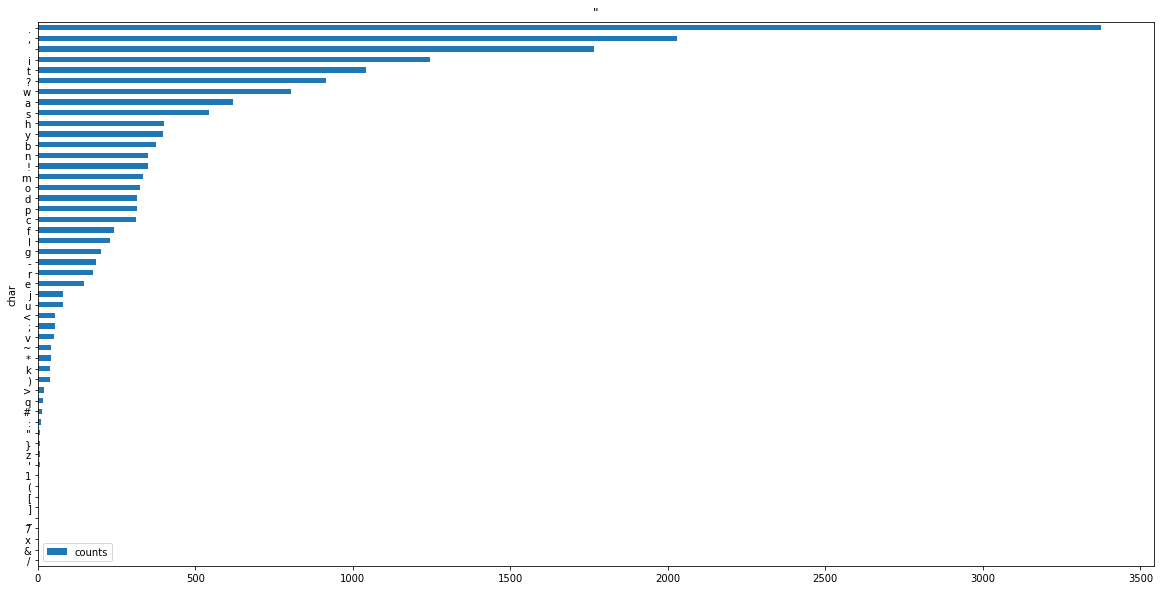

In [37]:
plot_dict(brown_chars.model[1]['"'],'char','counts','"')

## Extend Brown Corpus with generated quoted text:
#### Does not help to "resolve" doublequotes, detaching them away from words, the Brown corpus has enough quotes connected with word letters, but since the spaces are adjacent to many other punctuations, they have f+/f- much higher than doublequotes, so can not be resolved by threshold compared to word letters.  

In [12]:
lexicon_text = url_text_lines("https://raw.githubusercontent.com/aigents/aigents-java/master/lexicon_english.txt")
print(len(lexicon_text))


97565


In [31]:
lexicon_words = [line.split()[0] for line in lexicon_text]
print(len(lexicon_words))
print(lexicon_words[:5])
print(lexicon_words[-5:])


97565
['the', 'of', 'and', 'to', 'in']
['oilmen', 'evang', 'xxl', 'losey', 'westergaard']


In [30]:
lexicon_quoted = ' "'+'" "'.join(lexicon_words)+'" '
print(lexicon_quoted[:50])
print(lexicon_quoted[-50:])


 "the" "of" "and" "to" "in" "a" "is" "that" "for" 
dvi" "oilmen" "evang" "xxl" "losey" "westergaard" 


In [83]:
brown_plus_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_plus_chars.count_params())
brown_plus_chars.train([lexicon_quoted])
print(brown_plus_chars.count_params())
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_plus_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)


10967135
14238655
N	thres.	F1
[1]	0.2	0.63
[1]	0.3	0.57
[1]	0.4	0.56
[1]	0.5	0.56
[1]	0.6	0.51
[1]	0.7	0.5
[1]	0.8	0.78
[1, 2]	0.2	0.36
[1, 2]	0.3	0.76
[1, 2]	0.4	0.91
[1, 2]	0.5	0.86
[1, 2]	0.6	0.78
[1, 2]	0.7	0.72
[1, 2]	0.8	0.63
[2, 3]	0.2	0.46
[2, 3]	0.3	0.59
[2, 3]	0.4	0.72
[2, 3]	0.5	0.71
[2, 3]	0.6	0.59
[2, 3]	0.7	0.39
[2, 3]	0.8	0.17
[1, 2, 3]	0.2	0.56
[1, 2, 3]	0.3	0.74
[1, 2, 3]	0.4	0.82
[1, 2, 3]	0.5	0.82
[1, 2, 3]	0.6	0.64
[1, 2, 3]	0.7	0.5
[1, 2, 3]	0.8	0.28
[1, 2, 3, 4]	0.2	0.67
[1, 2, 3, 4]	0.3	0.8
[1, 2, 3, 4]	0.4	0.76
[1, 2, 3, 4]	0.5	0.65
[1, 2, 3, 4]	0.6	0.45
[1, 2, 3, 4]	0.7	0.21
[1, 2, 3, 4]	0.8	0.1


In [84]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)


10967135
N	thres.	F1
[1]	0.2	0.59
[1]	0.3	0.62
[1]	0.4	0.57
[1]	0.5	0.56
[1]	0.6	0.56
[1]	0.7	0.78
[1]	0.8	0.78
[1, 2]	0.2	0.4
[1, 2]	0.3	0.61
[1, 2]	0.4	0.91
[1, 2]	0.5	0.9
[1, 2]	0.6	0.79
[1, 2]	0.7	0.72
[1, 2]	0.8	0.67
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.78
[2, 3]	0.5	0.75
[2, 3]	0.6	0.65
[2, 3]	0.7	0.43
[2, 3]	0.8	0.2
[1, 2, 3]	0.2	0.56
[1, 2, 3]	0.3	0.79
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.85
[1, 2, 3]	0.6	0.7
[1, 2, 3]	0.7	0.55
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.69
[1, 2, 3, 4]	0.3	0.82
[1, 2, 3, 4]	0.4	0.78
[1, 2, 3, 4]	0.5	0.7
[1, 2, 3, 4]	0.6	0.51
[1, 2, 3, 4]	0.7	0.25
[1, 2, 3, 4]	0.8	0.11


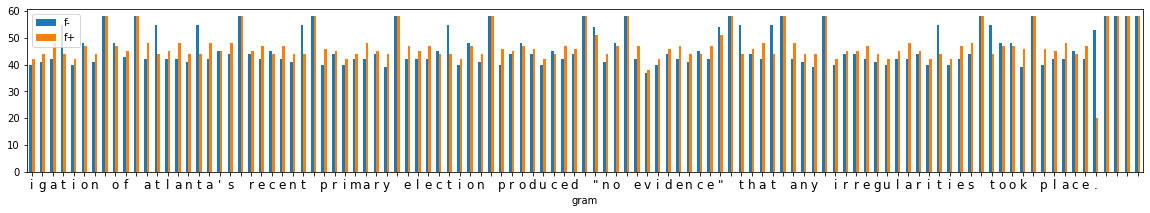

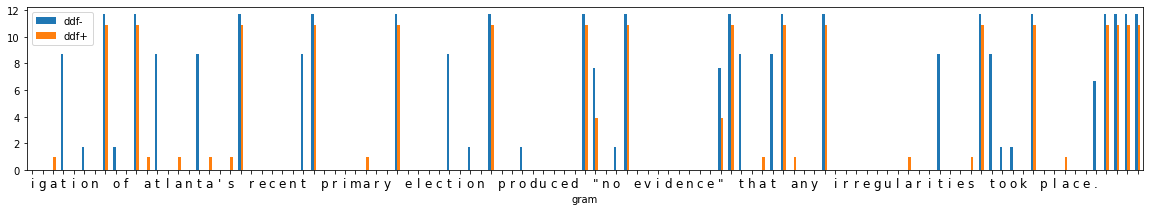

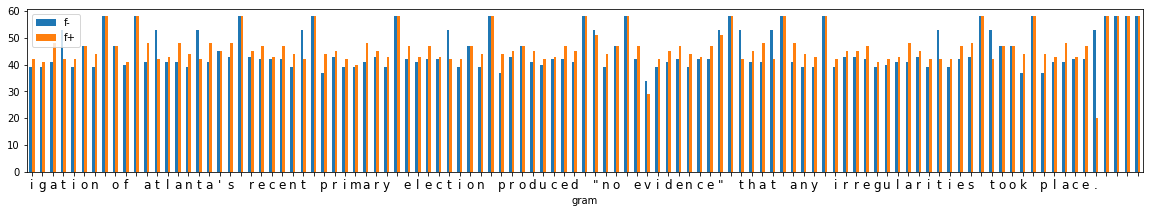

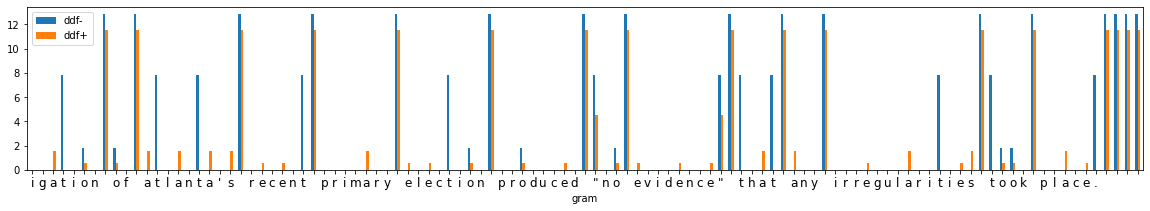

In [86]:
text = test_texts[0].lower()[50:]

df = profile_freedoms_ex_df(brown_plus_chars.model,text,1)
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])
df = profile_freedoms_ex_df(brown_chars.model,text,1)
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])


In [99]:
for threshold in [0.3,0.4]: 
    tokens = tokenize_with_opposite_metrics(brown_chars.model,text,'ddf-','ddf+',[1],threshold=threshold,debug=False)
    print(threshold,str(tokens))


0.3 ['iga', 'tion', ' ', 'of', ' ', 'a', 'tlan', "ta's", ' ', 'recen', 't', ' ', 'primary', ' ', 'elec', 'tion', ' ', 'produced', ' ', '"', 'no', ' ', 'evidence', '"', ' ', 'tha', 't', ' ', 'any', ' ', 'irregulari', 'ties', ' ', 'took', ' ', 'place', '.', ' ', ' ', ' ', ' ']
0.4 ['iga', 'tion', ' ', 'of', ' ', 'a', 'tlan', "ta's", ' ', 'recen', 't', ' ', 'primary', ' ', 'elec', 'tion', ' ', 'produced', ' ', '"no', ' ', 'evidence', '"', ' ', 'tha', 't', ' ', 'any', ' ', 'irregulari', 'ties', ' ', 'took', ' ', 'place', '.', ' ', ' ', ' ', ' ']


In [100]:
print(len(brown_plus_chars.model[1]['"']),len(brown_plus_chars.model[2]['"']))
print(len(brown_chars.model[1]['"']),len(brown_chars.model[2]['"']))
print(set(brown_plus_chars.model[1]['"']))
print(set(brown_chars.model[1]['"']))
print(set(brown_plus_chars.model[2]['"']))
print(set(brown_chars.model[2]['"']))
print()
print(len(brown_plus_chars.model[1][' ']),len(brown_plus_chars.model[2][' ']))
print(len(brown_chars.model[1][' ']),len(brown_chars.model[2][' ']))
print(set(brown_plus_chars.model[1][' ']))
print(set(brown_chars.model[1][' ']))
print(set(brown_plus_chars.model[2][' ']))
print(set(brown_chars.model[2][' ']))
print()

print(len(brown_plus_chars.model[1]['a']),len(brown_plus_chars.model[2]['a']))
print(len(brown_chars.model[1]['a']),len(brown_chars.model[2]['a']))


51 54
51 53
{'a', 't', 'd', '/', ',', 'c', ';', '"', 'l', 'q', ':', 'u', '1', 'y', '7', ' ', '.', '(', 'x', '>', 'z', "'", ']', '!', 'r', 'p', 'b', 'j', '-', 'o', 'e', 'k', 'm', 's', '<', 'h', 'f', '[', 'w', '*', '_', 'n', 'i', '}', '&', 'g', '#', '?', ')', 'v', '~'}
{'a', 't', 'd', '/', ',', 'c', ';', '"', 'l', 'q', ':', 'u', '1', 'y', '7', ' ', '.', '(', 'x', '>', 'z', "'", ']', '!', 'r', 'p', 'b', 'j', '-', 'o', 'e', 'k', 'm', 's', '<', 'h', 'f', '[', 'w', '*', '_', 'n', 'i', '}', '&', 'g', '#', '?', ')', 'v', '~'}
{'a', 't', 'd', ',', 'c', '"', 'l', 'q', '4', 'u', '1', 'y', ' ', '{', '(', 'x', '>', 'z', "'", ']', '!', 'r', '@', '9', 'p', 'b', '5', 'j', '8', '-', 'e', 'o', 'k', 'm', 's', '2', '<', 'h', 'f', '[', 'w', '_', 'n', 'i', '3', '6', '&', 'g', '#', '?', '%', 'v', '0', ')'}
{'a', 't', 'd', ',', 'c', '"', 'l', '4', 'u', '1', 'y', ' ', '{', '(', 'x', '>', 'z', "'", ']', '!', 'r', '@', '9', 'p', 'b', '5', 'j', '8', '-', 'e', 'o', 'k', 'm', 's', '2', '<', 'h', 'f', '[', 'w', '_',

## Experiment with "freedom" model compression

In [230]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())
print("N\tthres.\tF1")
#for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
for nlist in [[1],[1,2],[2,3],[1,2,3]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)

10967135
N	thres.	F1
[1]	0.2	0.59
[1]	0.3	0.62
[1]	0.4	0.57
[1]	0.5	0.56
[1]	0.6	0.56
[1]	0.7	0.78
[1]	0.8	0.78
[1, 2]	0.2	0.4
[1, 2]	0.3	0.61
[1, 2]	0.4	0.91
[1, 2]	0.5	0.9
[1, 2]	0.6	0.79
[1, 2]	0.7	0.72
[1, 2]	0.8	0.67
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.78
[2, 3]	0.5	0.75
[2, 3]	0.6	0.65
[2, 3]	0.7	0.43
[2, 3]	0.8	0.2
[1, 2, 3]	0.2	0.56
[1, 2, 3]	0.3	0.79
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.85
[1, 2, 3]	0.6	0.7
[1, 2, 3]	0.7	0.55
[1, 2, 3]	0.8	0.32


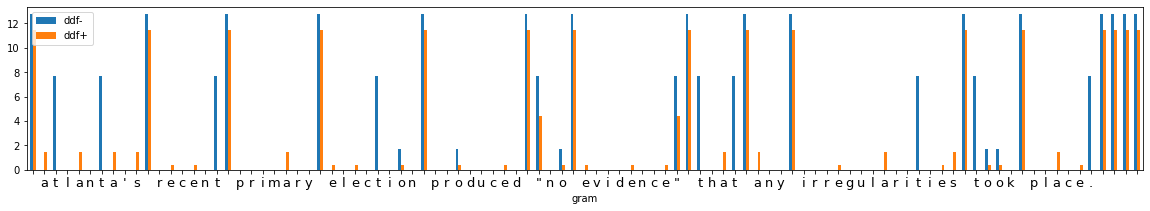

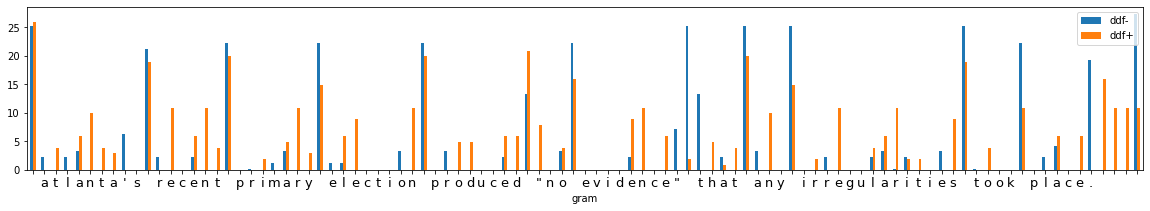

In [231]:
text = test_texts[0].lower()[60:]
df = profile_freedoms_ex_df(brown_chars.model,text,1)
plot_bars(df,'gram',['ddf-','ddf+'])
df = profile_freedoms_ex_df(brown_chars.model,text,2)
plot_bars(df,'gram',['ddf-','ddf+'])


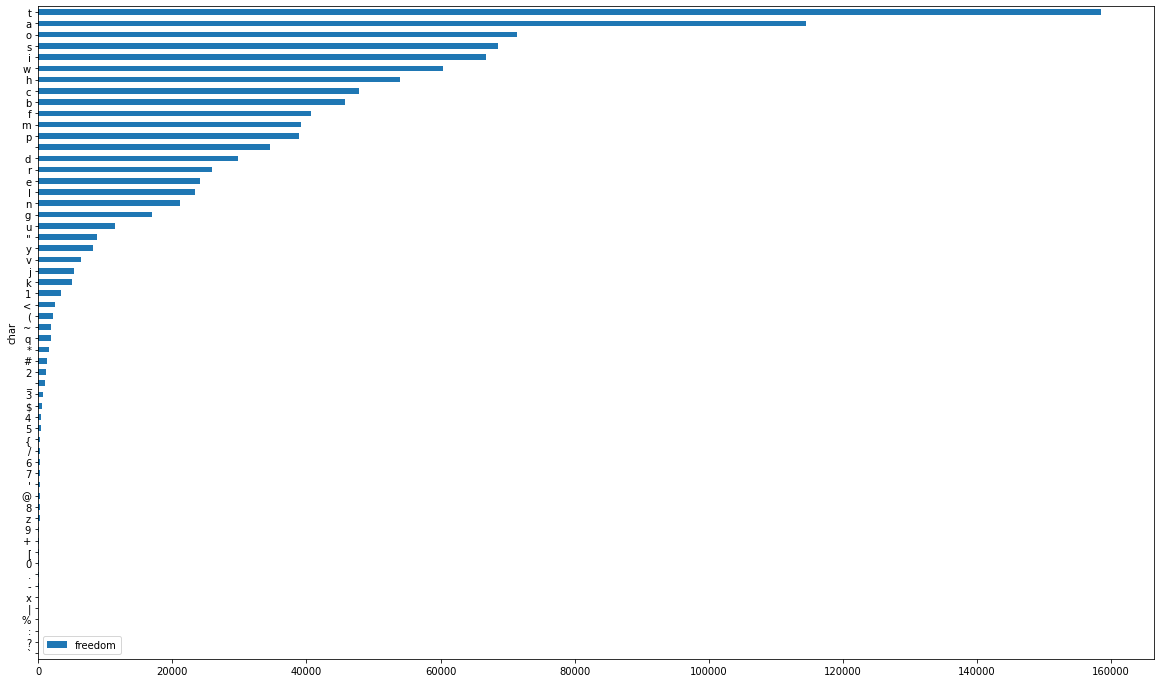

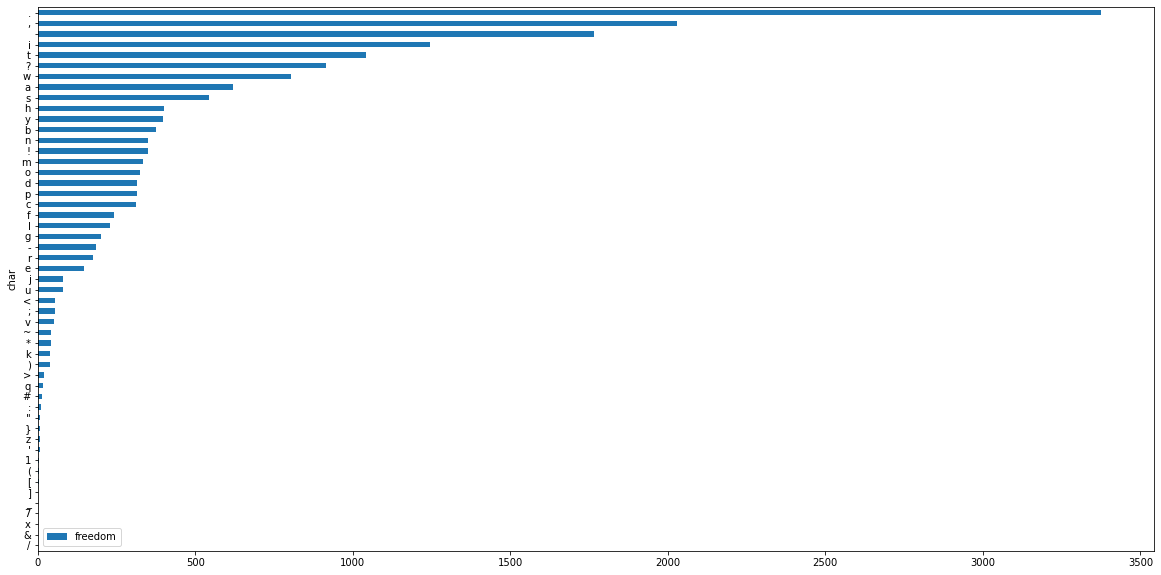

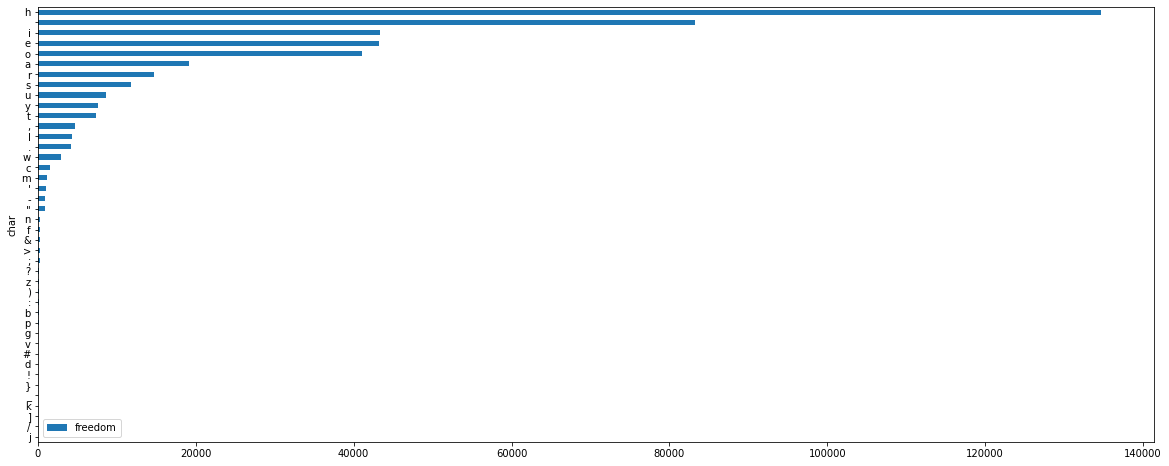

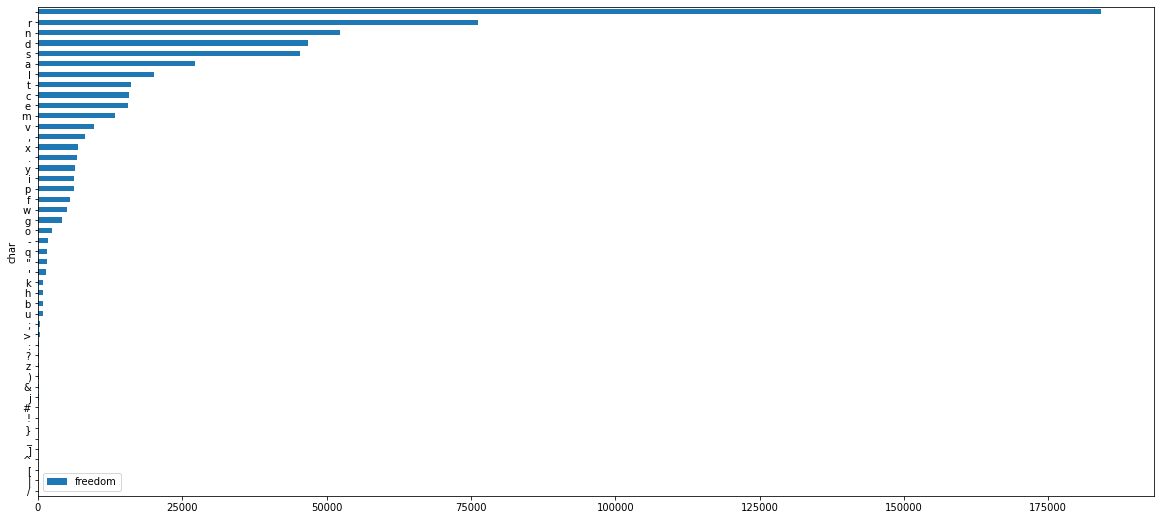

In [232]:
plot_dict(brown_chars.model[1][' '],'char','freedom')
plot_dict(brown_chars.model[1]['"'],'char','freedom')
plot_dict(brown_chars.model[1]['t'],'char','freedom')
plot_dict(brown_chars.model[1]['e'],'char','freedom')

In [233]:
def dict_compress_with_loss(dic,threshold=0.01):
    maxval = None
    for d in dic:
        v=dic[d]
        if isinstance(v,dict):
            dict_compress_with_loss(v,threshold) # recursion
        else:
            assert (type(v) == int or float)
            if maxval is None or maxval < v:
                maxval = v
    if maxval is not None:
        todo = []
        minval = maxval * threshold
        for d in dic:
            if dic[d] < minval:
                 todo.append(d)
        for d in todo:
            del dic[d]
    return dic
assert str(dict_compress_with_loss({'a':1000,'b':10,'c':1})) == "{'a': 1000, 'b': 10}"
assert str(dict_compress_with_loss({'x':{'a':1000,'b':10,'c':1},'y':{'m':2000,'n':20,'o':2}})) == "{'x': {'a': 1000, 'b': 10}, 'y': {'m': 2000, 'n': 20}}"


def compress_with_loss(model,threshold=0.01):
    dict_compress_with_loss(model[0],threshold)
    dict_compress_with_loss(model[1],threshold)
    dict_compress_with_loss(model[2],threshold)
    

In [234]:
compress_with_loss(brown_chars.model,0.0001)
print(brown_chars.count_params())
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)

8643703
N	thres.	F1
[1]	0.2	0.92
[1]	0.3	0.97
[1]	0.4	0.98
[1]	0.5	0.94
[1]	0.6	0.87
[1]	0.7	0.88
[1]	0.8	0.88
[1, 2]	0.2	0.43
[1, 2]	0.3	0.66
[1, 2]	0.4	0.93
[1, 2]	0.5	0.94
[1, 2]	0.6	0.89
[1, 2]	0.7	0.78
[1, 2]	0.8	0.73
[2, 3]	0.2	0.47
[2, 3]	0.3	0.64
[2, 3]	0.4	0.79
[2, 3]	0.5	0.79
[2, 3]	0.6	0.73
[2, 3]	0.7	0.54
[2, 3]	0.8	0.36
[1, 2, 3]	0.2	0.57
[1, 2, 3]	0.3	0.78
[1, 2, 3]	0.4	0.87
[1, 2, 3]	0.5	0.86
[1, 2, 3]	0.6	0.8
[1, 2, 3]	0.7	0.62
[1, 2, 3]	0.8	0.43


53 55
51 53


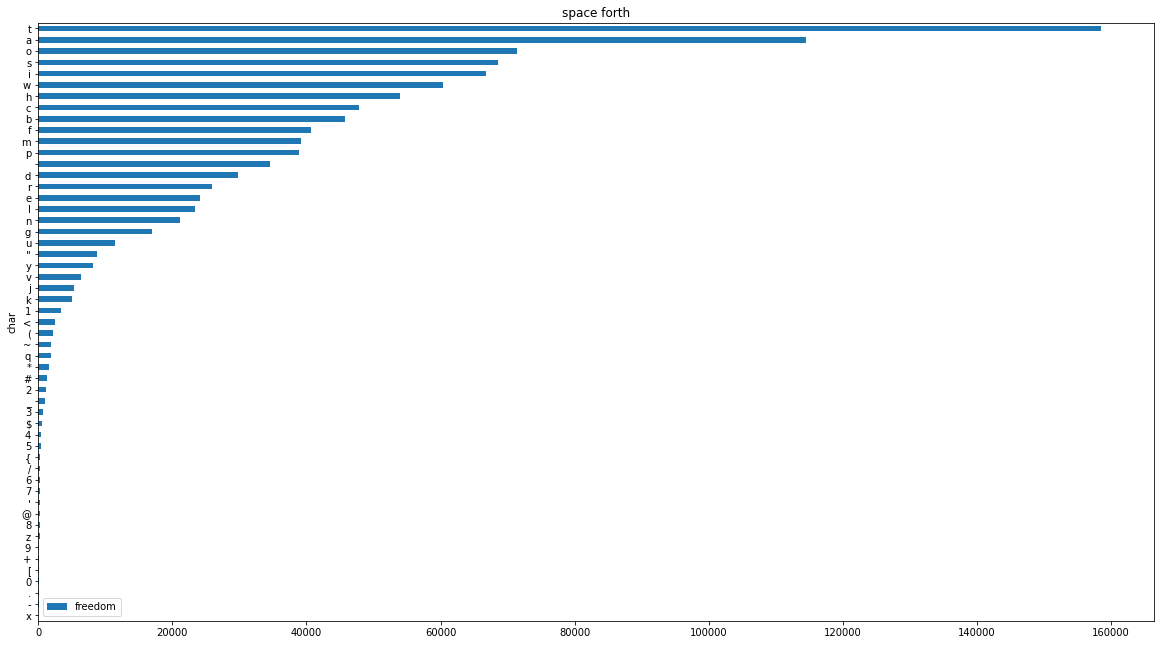

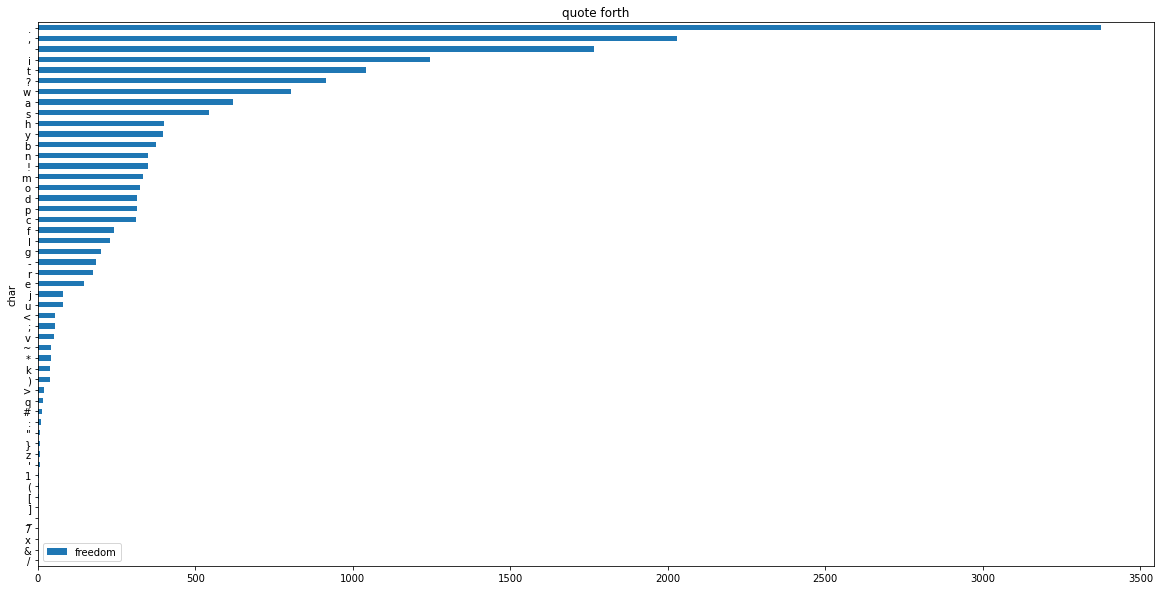

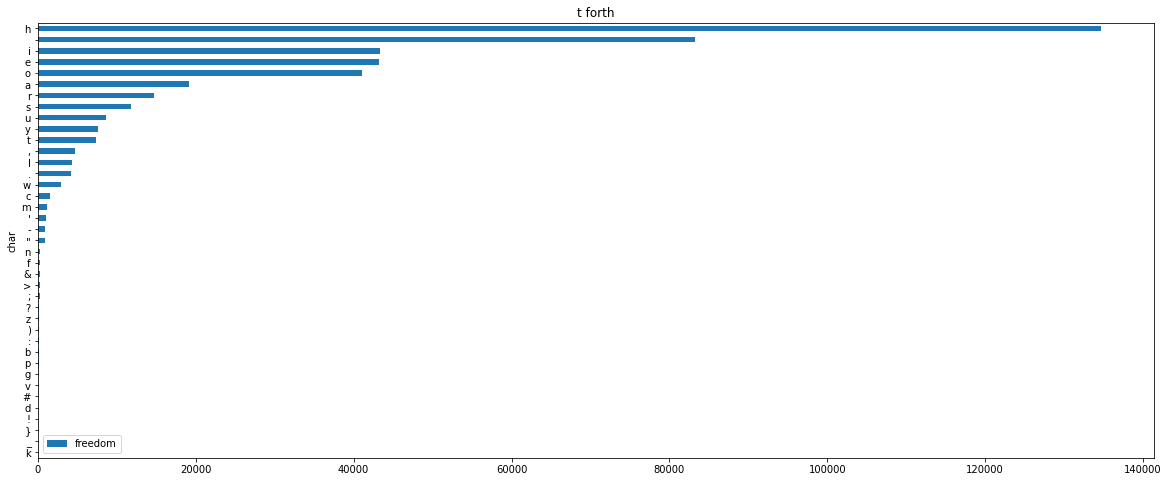

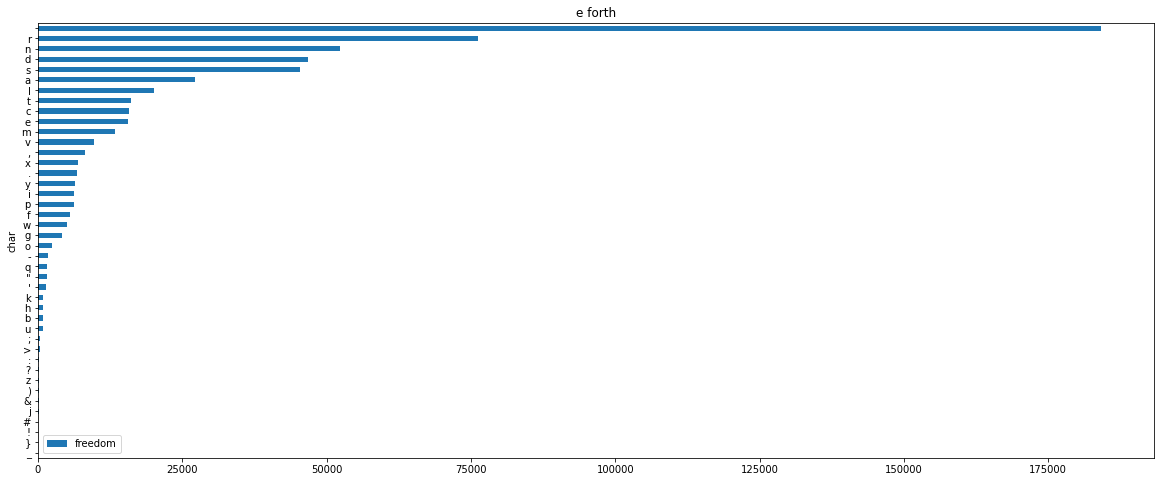

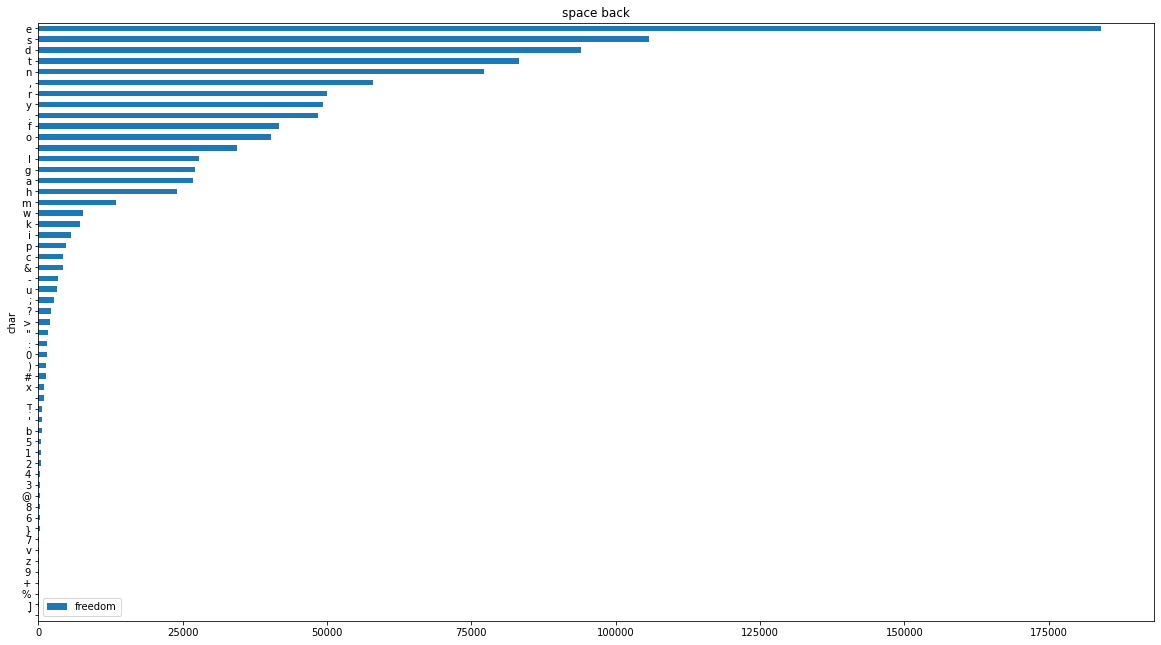

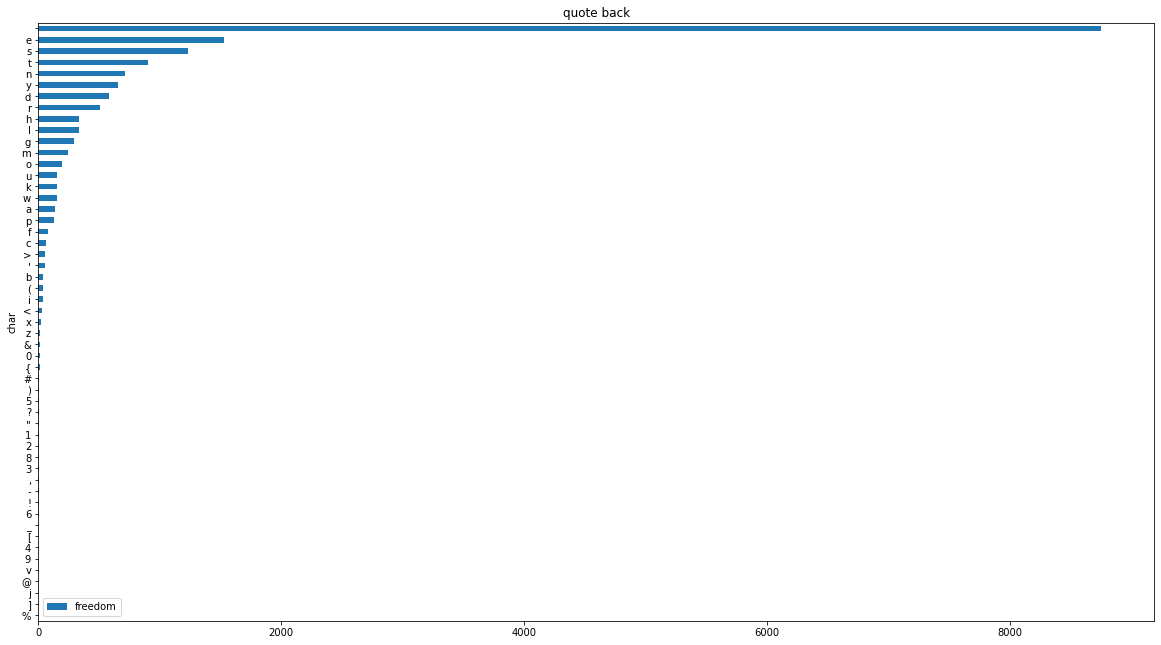

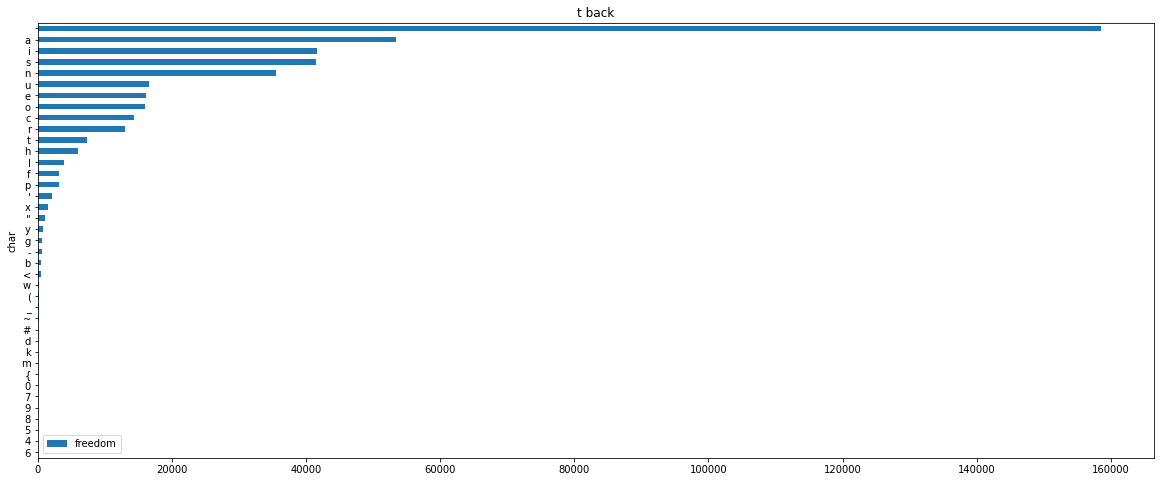

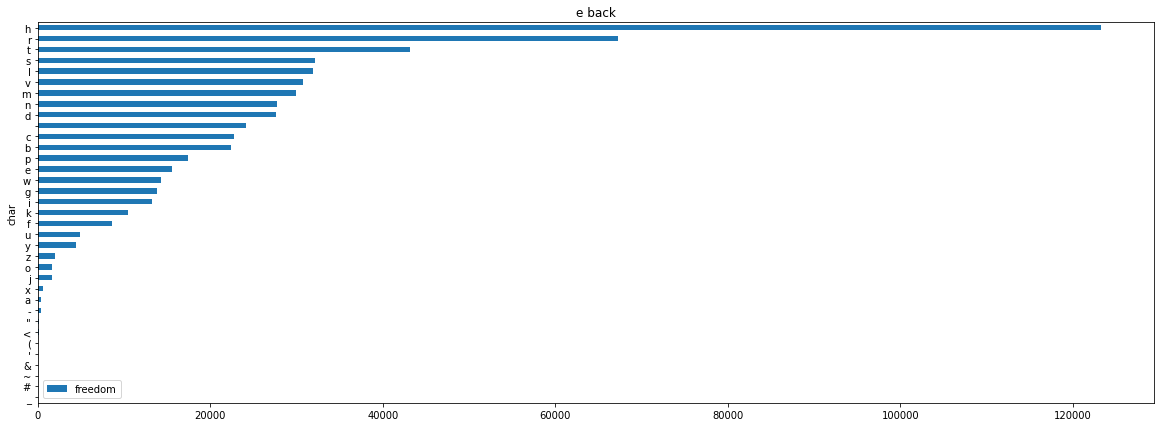

In [235]:
print(len(brown_chars.model[1][' ']),len(brown_chars.model[2][' ']))
print(len(brown_chars.model[1]['"']),len(brown_chars.model[2]['"']))

plot_dict(brown_chars.model[1][' '],'char','freedom',title="space forth")
plot_dict(brown_chars.model[1]['"'],'char','freedom',title="quote forth")
plot_dict(brown_chars.model[1]['t'],'char','freedom',title="t forth")
plot_dict(brown_chars.model[1]['e'],'char','freedom',title="e forth")
plot_dict(brown_chars.model[2][' '],'char','freedom',title="space back")
plot_dict(brown_chars.model[2]['"'],'char','freedom',title="quote back")
plot_dict(brown_chars.model[2]['t'],'char','freedom',title="t back")
plot_dict(brown_chars.model[2]['e'],'char','freedom',title="e back")


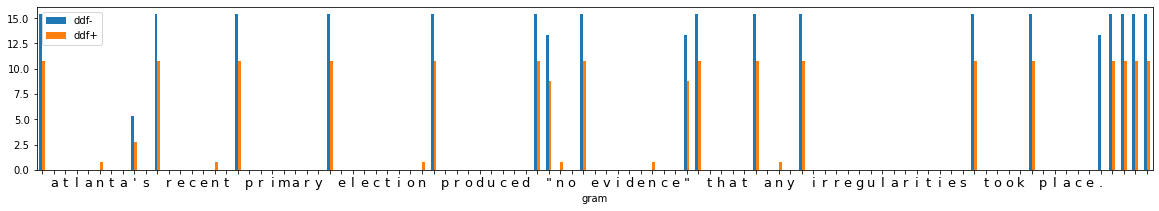

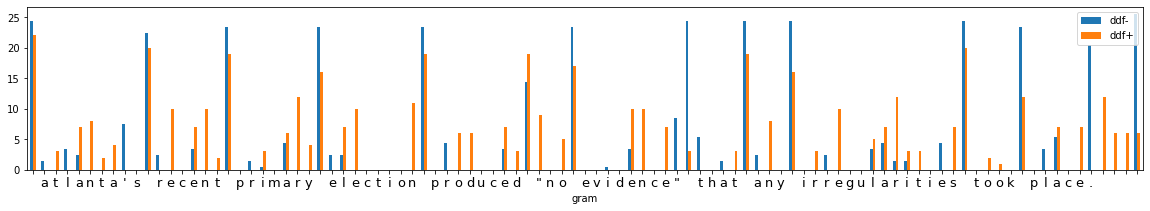

In [236]:
text = test_texts[0].lower()[60:]
df = profile_freedoms_ex_df(brown_chars.model,text,1)
plot_bars(df,'gram',['ddf-','ddf+'])
df = profile_freedoms_ex_df(brown_chars.model,text,2)
plot_bars(df,'gram',['ddf-','ddf+'])


In [238]:
compress_with_loss(brown_chars.model,0.001)
print(brown_chars.count_params())
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)

8596119
N	thres.	F1
[1]	0.2	0.46
[1]	0.3	0.47
[1]	0.4	0.84
[1]	0.5	0.96
[1]	0.6	0.85
[1]	0.7	0.79
[1]	0.8	0.77
[1, 2]	0.2	0.46
[1, 2]	0.3	0.66
[1, 2]	0.4	0.8
[1, 2]	0.5	0.94
[1, 2]	0.6	0.93
[1, 2]	0.7	0.7
[1, 2]	0.8	0.53
[2, 3]	0.2	0.53
[2, 3]	0.3	0.71
[2, 3]	0.4	0.82
[2, 3]	0.5	0.83
[2, 3]	0.6	0.7
[2, 3]	0.7	0.45
[2, 3]	0.8	0.11
[1, 2, 3]	0.2	0.58
[1, 2, 3]	0.3	0.76
[1, 2, 3]	0.4	0.89
[1, 2, 3]	0.5	0.9
[1, 2, 3]	0.6	0.84
[1, 2, 3]	0.7	0.59
[1, 2, 3]	0.8	0.24


46 50
43 34


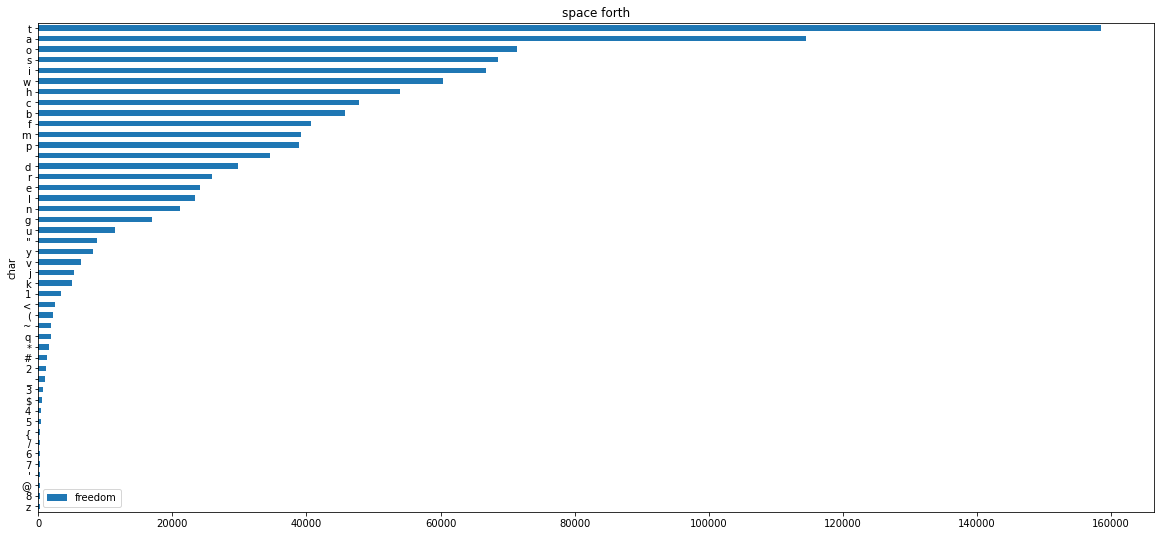

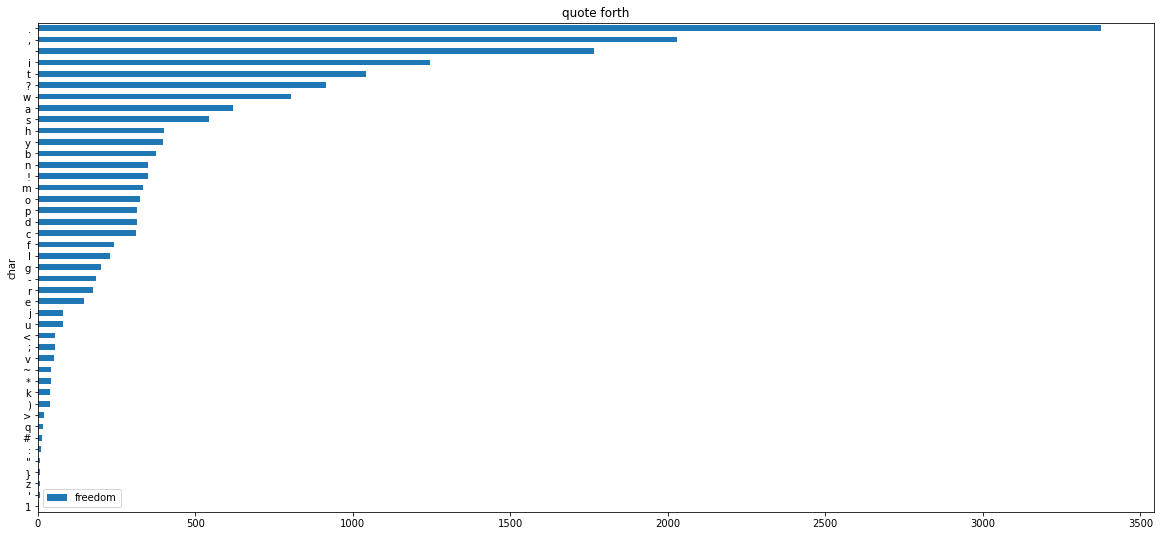

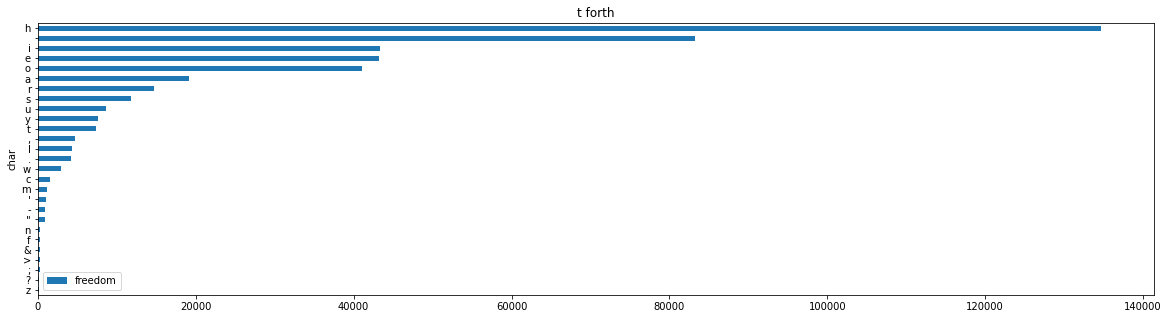

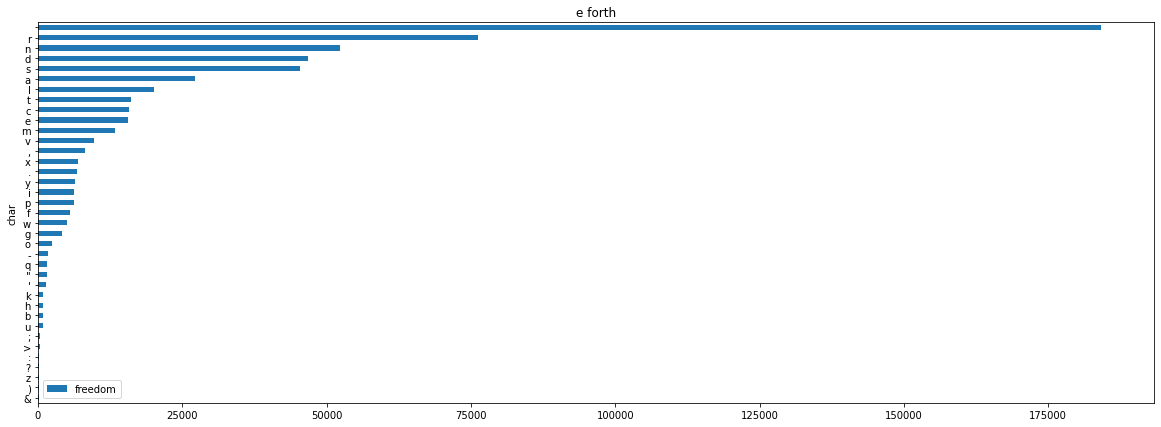

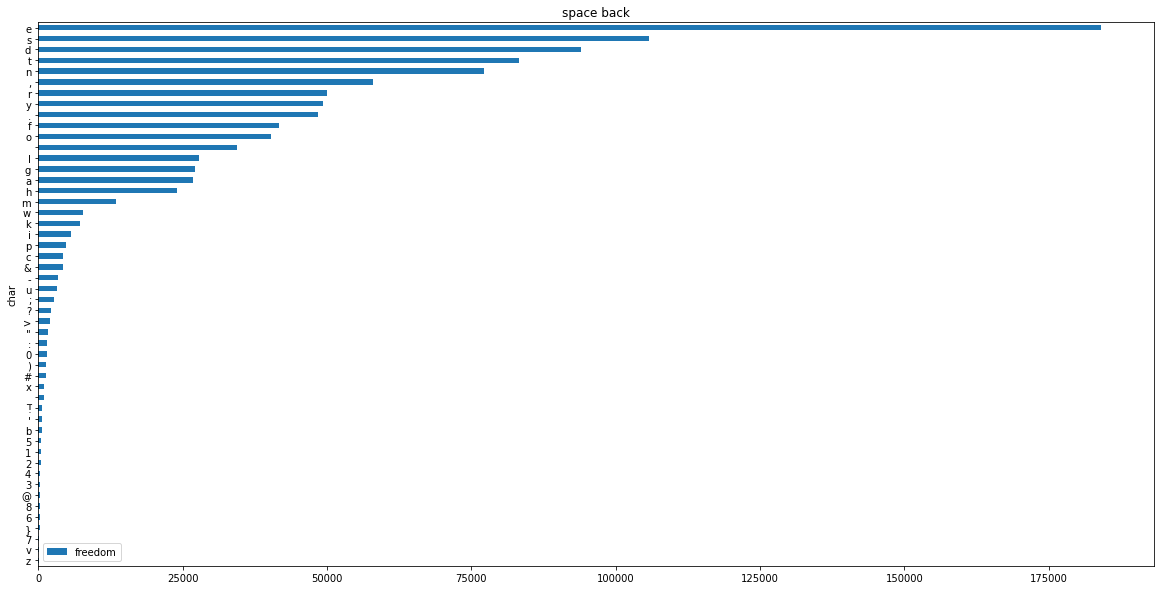

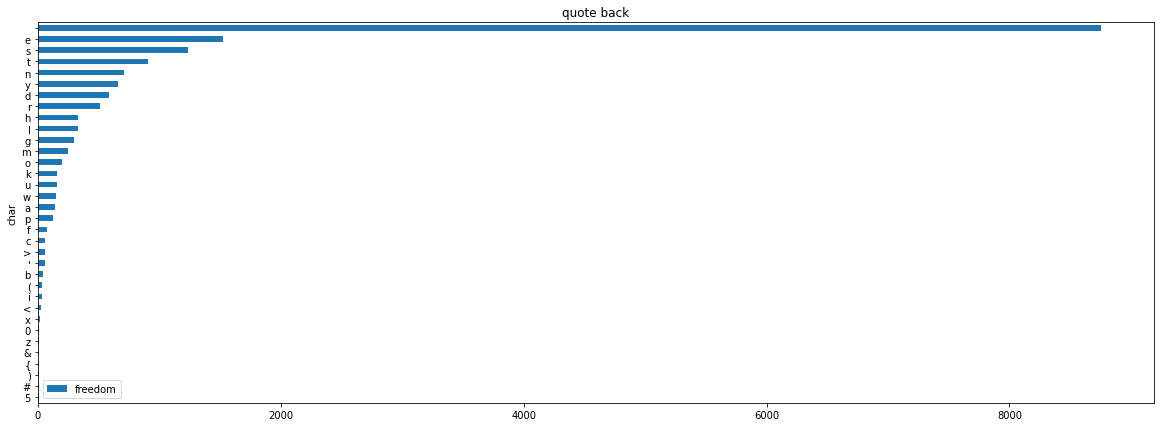

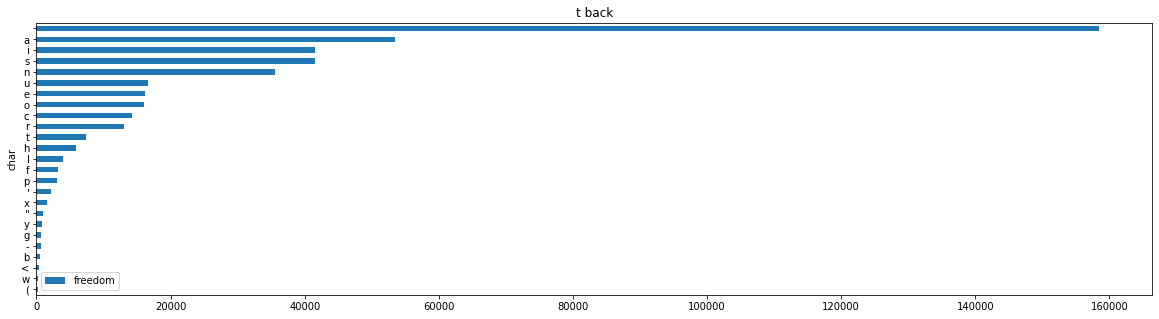

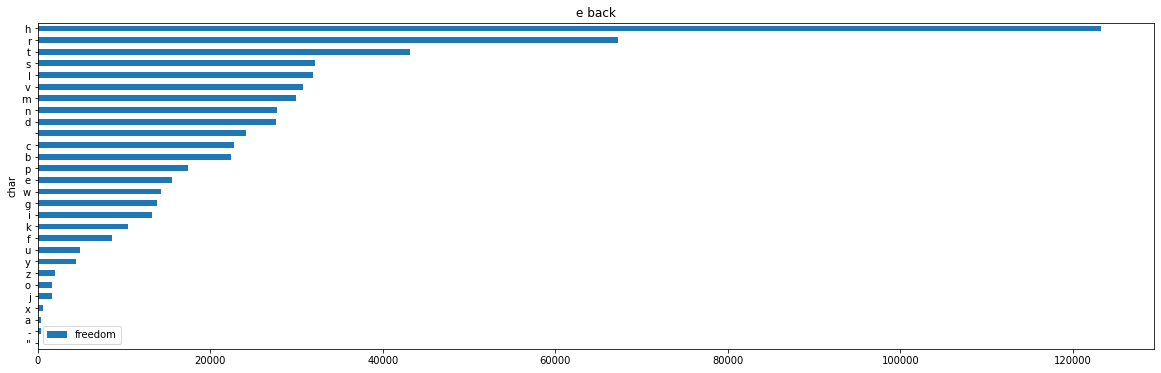

In [240]:
print(len(brown_chars.model[1][' ']),len(brown_chars.model[2][' ']))
print(len(brown_chars.model[1]['"']),len(brown_chars.model[2]['"']))

plot_dict(brown_chars.model[1][' '],'char','freedom',title="space forth")
plot_dict(brown_chars.model[1]['"'],'char','freedom',title="quote forth")
plot_dict(brown_chars.model[1]['t'],'char','freedom',title="t forth")
plot_dict(brown_chars.model[1]['e'],'char','freedom',title="e forth")
plot_dict(brown_chars.model[2][' '],'char','freedom',title="space back")
plot_dict(brown_chars.model[2]['"'],'char','freedom',title="quote back")
plot_dict(brown_chars.model[2]['t'],'char','freedom',title="t back")
plot_dict(brown_chars.model[2]['e'],'char','freedom',title="e back")


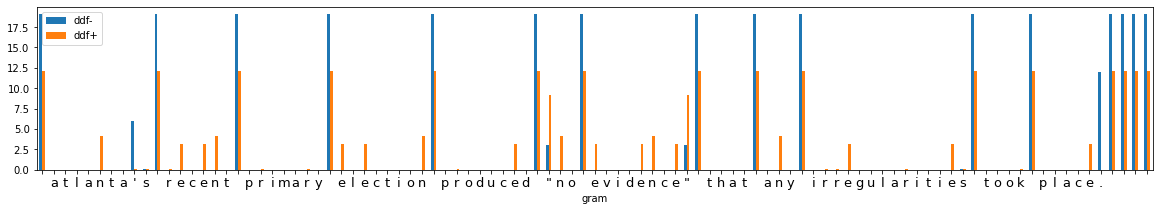

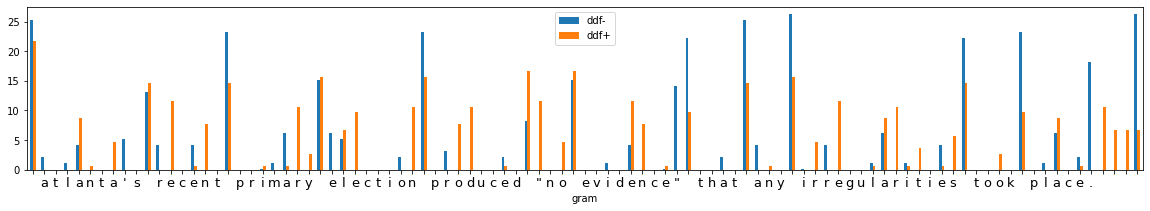

In [241]:
text = test_texts[0].lower()[60:]
df = profile_freedoms_ex_df(brown_chars.model,text,1)
plot_bars(df,'gram',['ddf-','ddf+'])
df = profile_freedoms_ex_df(brown_chars.model,text,2)
plot_bars(df,'gram',['ddf-','ddf+'])


In [242]:
compress_with_loss(brown_chars.model,0.01)
print(brown_chars.count_params())
print("N\tthres.\tF1")
for nlist in [[1],[1,2],[2,3],[1,2,3]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)

8471014
N	thres.	F1
[1]	0.2	0.19
[1]	0.3	0.56
[1]	0.4	0.67
[1]	0.5	0.49
[1]	0.6	0.11
[1]	0.7	0.12
[1]	0.8	0.07
[1, 2]	0.2	0.3
[1, 2]	0.3	0.49
[1, 2]	0.4	0.73
[1, 2]	0.5	0.76
[1, 2]	0.6	0.48
[1, 2]	0.7	0.15
[1, 2]	0.8	0.07
[2, 3]	0.2	0.33
[2, 3]	0.3	0.52
[2, 3]	0.4	0.69
[2, 3]	0.5	0.71
[2, 3]	0.6	0.49
[2, 3]	0.7	0.26
[2, 3]	0.8	0.09
[1, 2, 3]	0.2	0.34
[1, 2, 3]	0.3	0.59
[1, 2, 3]	0.4	0.77
[1, 2, 3]	0.5	0.8
[1, 2, 3]	0.6	0.53
[1, 2, 3]	0.7	0.23
[1, 2, 3]	0.8	0.05


31 28
34 18


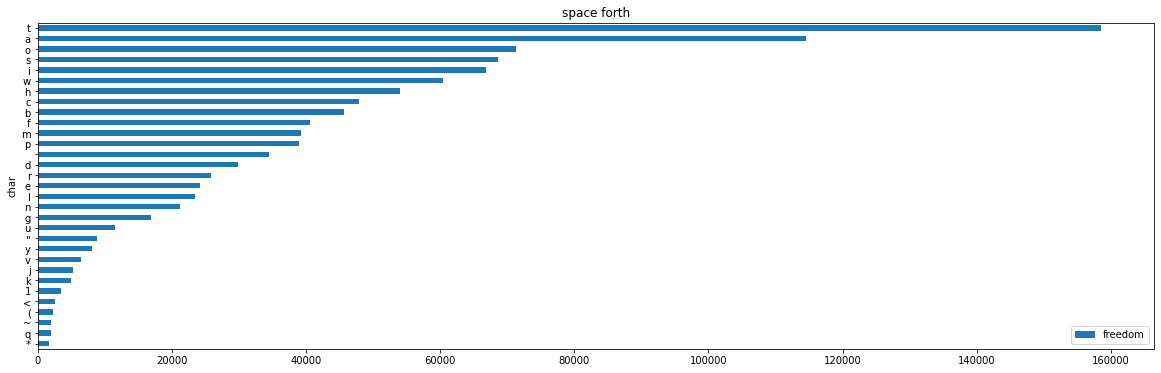

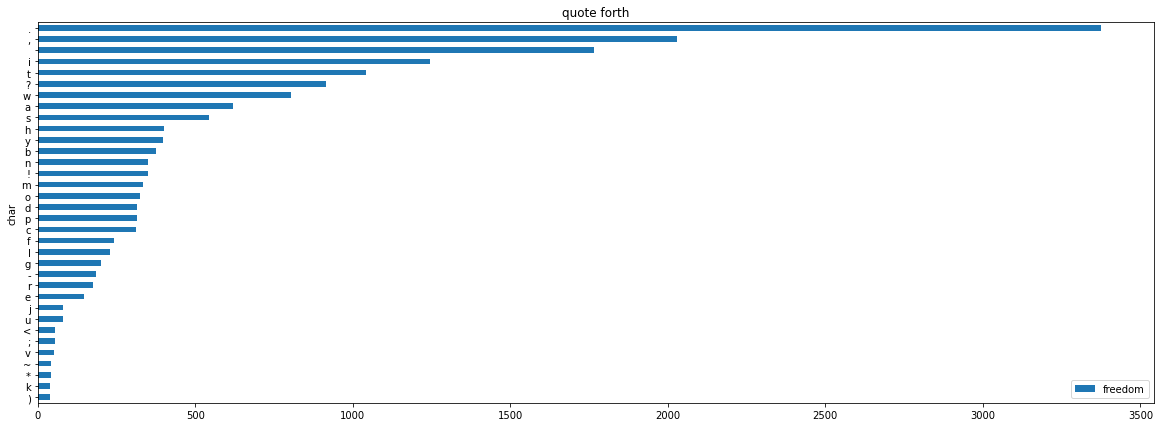

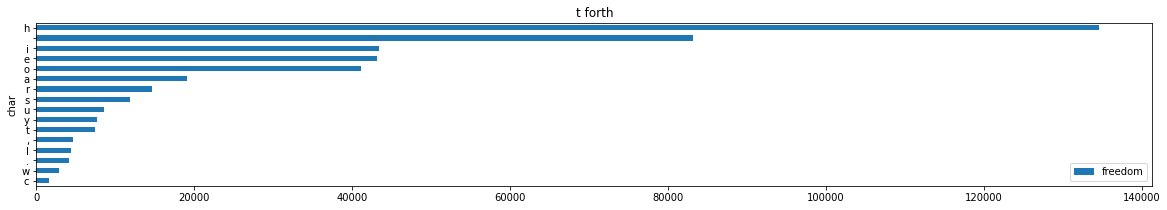

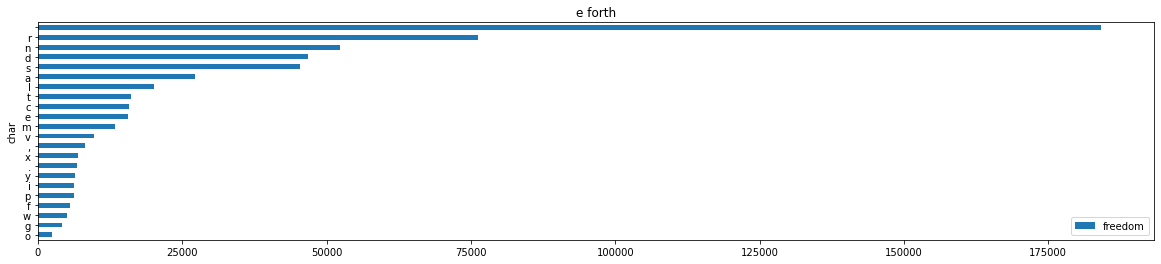

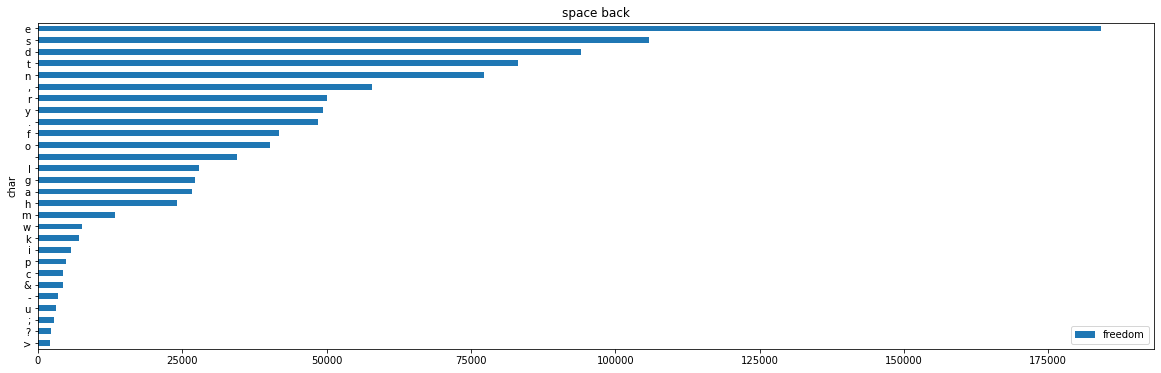

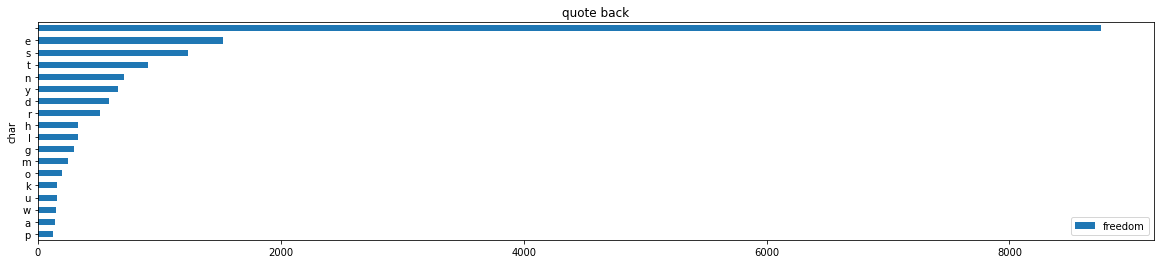

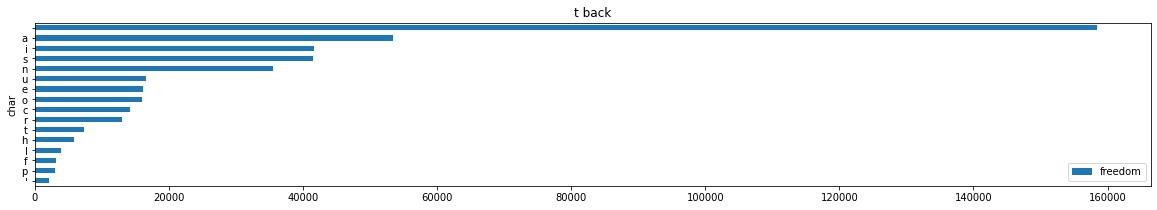

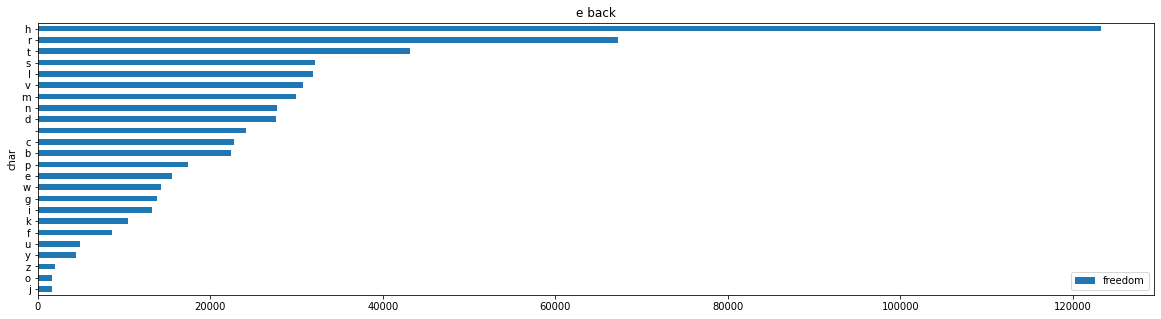

In [243]:
print(len(brown_chars.model[1][' ']),len(brown_chars.model[2][' ']))
print(len(brown_chars.model[1]['"']),len(brown_chars.model[2]['"']))

plot_dict(brown_chars.model[1][' '],'char','freedom',title="space forth")
plot_dict(brown_chars.model[1]['"'],'char','freedom',title="quote forth")
plot_dict(brown_chars.model[1]['t'],'char','freedom',title="t forth")
plot_dict(brown_chars.model[1]['e'],'char','freedom',title="e forth")
plot_dict(brown_chars.model[2][' '],'char','freedom',title="space back")
plot_dict(brown_chars.model[2]['"'],'char','freedom',title="quote back")
plot_dict(brown_chars.model[2]['t'],'char','freedom',title="t back")
plot_dict(brown_chars.model[2]['e'],'char','freedom',title="e back")


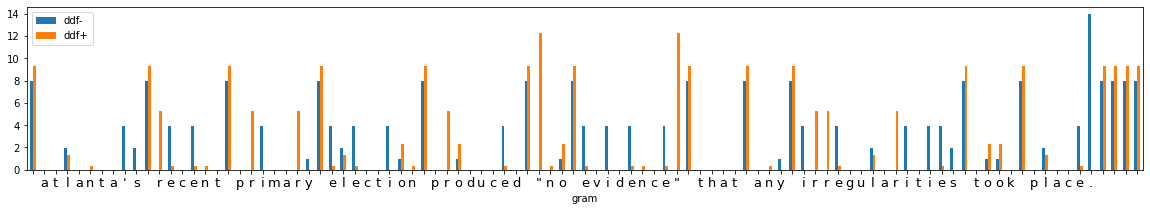

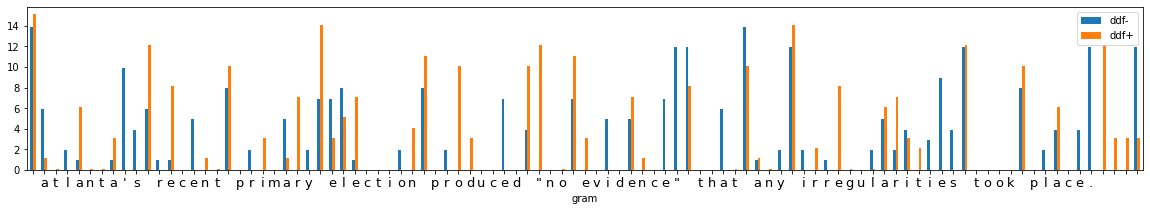

In [244]:
text = test_texts[0].lower()[60:]
df = profile_freedoms_ex_df(brown_chars.model,text,1)
plot_bars(df,'gram',['ddf-','ddf+'])
df = profile_freedoms_ex_df(brown_chars.model,text,2)
plot_bars(df,'gram',['ddf-','ddf+'])


## Comparing p+/p- and f+/f- metrics and their derivatives 

- use p+ and p- to generate dp+, dp-, ddp+, ddp- and tokenize based on EITHER of + and - as in case of ddf+, ddf- 
  - also try sums (|) and productions (&) across p+ and p- metrics with different N=[1..7] and directions +/-


In [102]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())


10967135


In [189]:
for nlist in [[1],[1,2],[2]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)


[1]	0.2	0.59
[1]	0.3	0.62
[1]	0.4	0.57
[1]	0.5	0.56
[1]	0.6	0.56
[1]	0.7	0.78
[1]	0.8	0.78
[1, 2]	0.2	0.4
[1, 2]	0.3	0.61
[1, 2]	0.4	0.91
[1, 2]	0.5	0.9
[1, 2]	0.6	0.79
[1, 2]	0.7	0.72
[1, 2]	0.8	0.67
[2]	0.2	0.32
[2]	0.3	0.44
[2]	0.4	0.48
[2]	0.5	0.75
[2]	0.6	0.87
[2]	0.7	0.67
[2]	0.8	0.55


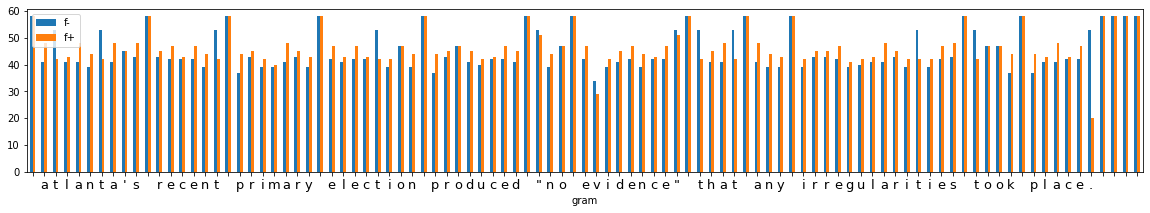

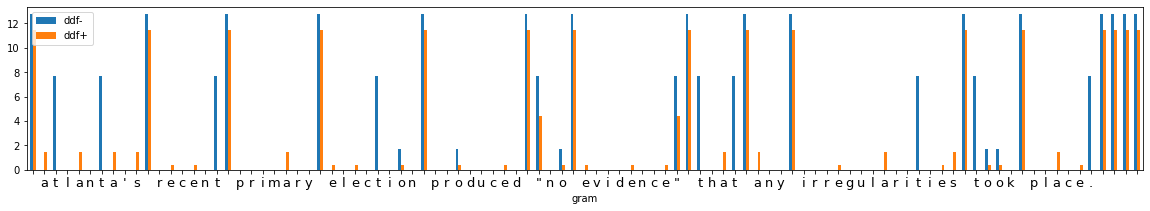

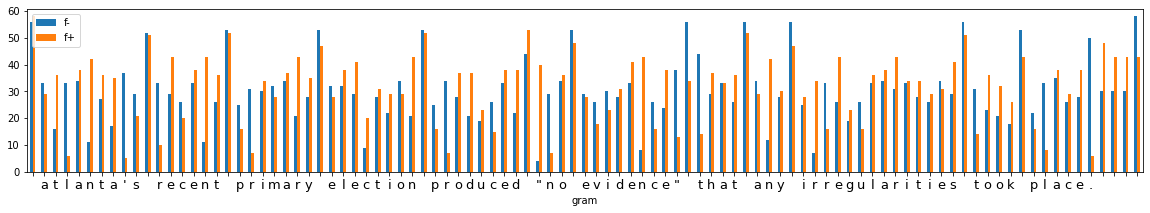

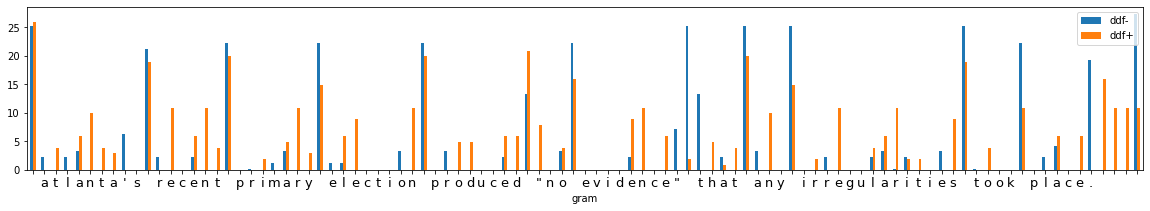

In [190]:
text = test_texts[0].lower()[60:]

df = profile_freedoms_ex_df(brown_chars.model,text,1)
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])

df = profile_freedoms_ex_df(brown_chars.model,text,2)
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])


In [191]:
df = profile_probabilities_ex_df(brown_chars.model,"tuna is a fish",2,debug=True)


Back 0-2:'tu'-'u'=t=>0.06662784829781453
Forw 0-1:'tu'-'t'=u=>0.019549910132375354
Back 1-3:'un'-'n'=u=>0.046452785474372565
Forw 1-2:'un'-'u'=n=>0.12143938511703738
Back 2-4:'na'-'a'=n=>0.029631046189957246
Forw 2-3:'na'-'n'=a=>0.03359081041430943
Back 3-5:'a '-' '=a=>0.02547639602760324
Forw 3-4:'a '-'a'= =>0.07003939978204377
Back 4-6:' i'-'i'= =>0.19310422613418474
Forw 4-5:' i'-' '=i=>0.06362524084227618
Back 5-7:'is'-'s'=i=>0.13356506066750345
Forw 5-6:'is'-'i'=s=>0.12001955017251002
Back 6-8:'s '-' '=s=>0.10088504176505228
Forw 6-7:'s '-'s'= =>0.34074538959158057
Back 7-9:' a'-'a'= =>0.2999910931343784
Forw 7-8:' a'-' '=a=>0.10911989419138933
Back 8-10:'a '-' '=a=>0.02547639602760324
Forw 8-9:'a '-'a'= =>0.07003939978204377
Back 9-11:' f'-'f'= =>0.36693584810218055
Forw 9-10:' f'-' '=f=>0.03870818968556623
Back 10-12:'fi'-'i'=f=>0.03020733015787632
Forw 10-11:'fi'-'f'=i=>0.09434899644102397
Back 11-13:'is'-'s'=i=>0.13356506066750345
Forw 11-12:'is'-'i'=s=>0.12001955017251002
Bac

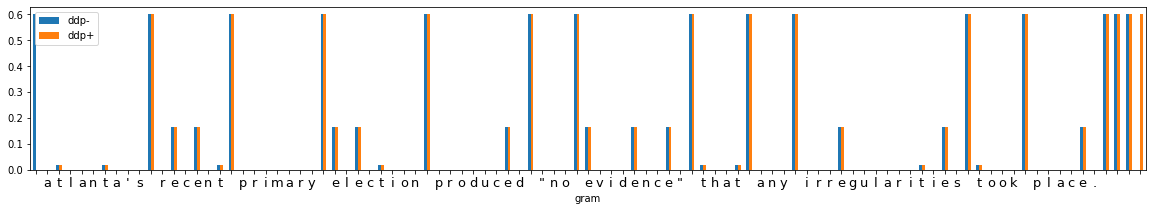

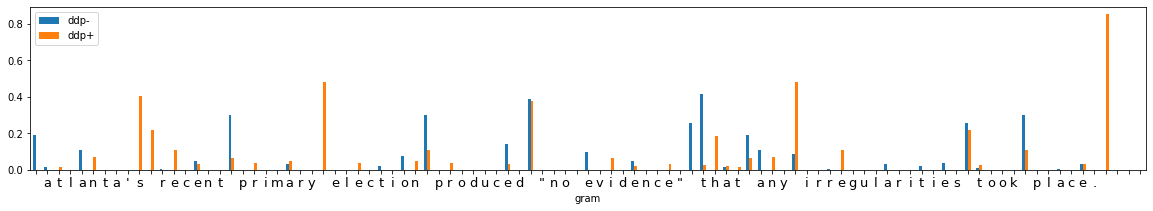

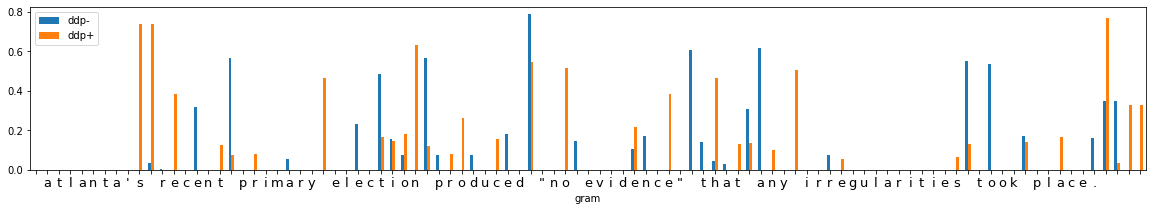

In [192]:
df1 = profile_probabilities_ex_df(brown_chars.model,text,1)
plot_bars(df1,'gram',['ddp-','ddp+'])

df2 = profile_probabilities_ex_df(brown_chars.model,text,2)
plot_bars(df2,'gram',['ddp-','ddp+'])

df3 = profile_probabilities_ex_df(brown_chars.model,text,3)
plot_bars(df3,'gram',['ddp-','ddp+'])


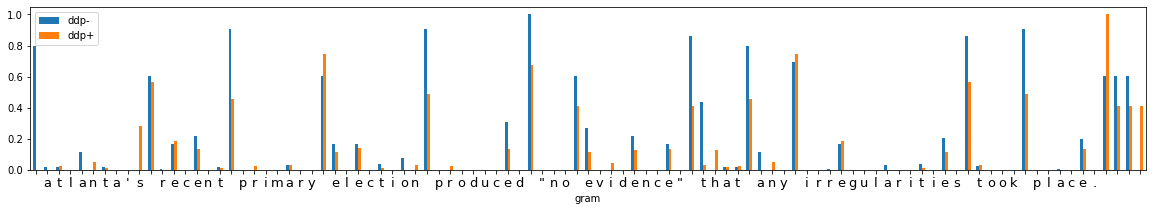

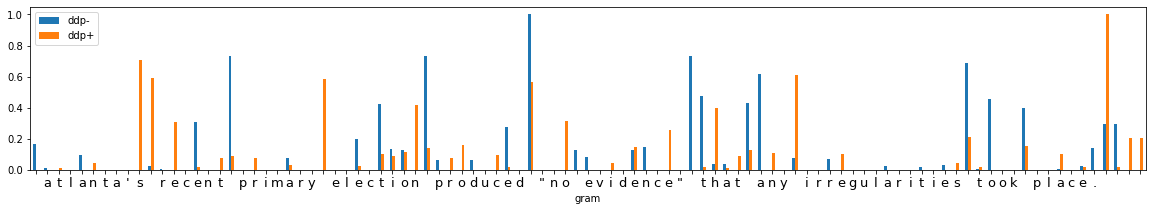

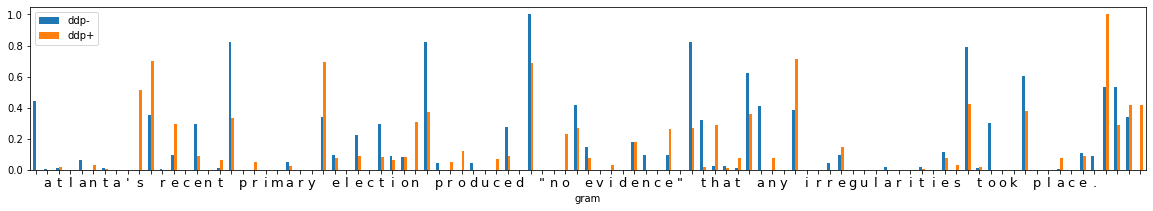

In [193]:
df12 = profile_probabilities_avg_df(brown_chars.model,text,['ddp-','ddp+'],[1,2])
plot_bars(df12,'gram',['ddp-','ddp+'])
df23 = profile_probabilities_avg_df(brown_chars.model,text,['ddp-','ddp+'],[2,3])
plot_bars(df23,'gram',['ddp-','ddp+'])
df123 = profile_probabilities_avg_df(brown_chars.model,text,['ddp-','ddp+'],[1,2,3])
plot_bars(df123,'gram',['ddp-','ddp+'])


In [194]:
for nlist in [[1],[1,2],[2]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        evaluate_tokenizer(brown_chars.model,test_texts,'ddp-','ddp+',nlist,threshold,profiler=profile_probabilities_avg_df,spaces=False)


[1]	0.2	0.31
[1]	0.3	0.7
[1]	0.4	0.78
[1]	0.5	0.78
[1]	0.6	0.78
[1]	0.7	0.78
[1]	0.8	0.78
[1, 2]	0.2	0.55
[1, 2]	0.3	0.71
[1, 2]	0.4	0.76
[1, 2]	0.5	0.5
[1, 2]	0.6	0.18
[1, 2]	0.7	0.08
[1, 2]	0.8	0.03
[2]	0.2	0.23
[2]	0.3	0.21
[2]	0.4	0.09
[2]	0.5	0.05
[2]	0.6	0.03
[2]	0.7	0.03
[2]	0.8	0.02


In [195]:
tokens = tokenize_with_opposite_metrics(brown_chars.model,text,'ddf-','ddf+',[1,2],threshold=0.4,profiler=profile_freedoms_avg_df,debug=False)
print(str(tokens))
tokens = tokenize_with_opposite_metrics(brown_chars.model,text,'ddp-','ddp+',[1,2],threshold=0.4,profiler=profile_probabilities_avg_df,debug=False)
print(str(tokens))



[' ', "atlanta's", ' ', 'recent', ' ', 'primary', ' ', 'election', ' ', 'produced', ' ', '"no', ' ', 'evidence"', ' ', 'that', ' ', 'any', ' ', 'irregularities', ' ', 'took', ' ', 'place', '. ', ' ', ' ', ' ']
[" atlanta's", ' ', 'recent', ' ', 'primary', ' ', 'election', ' ', 'produced', ' ', '"no', ' ', 'evidence"', ' ', 'that', ' ', 'any', ' ', 'irregularities', ' ', 'took', ' ', 'place.', ' ', ' ', ' ', ' ']


In [188]:
#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, plot_profile_probabilities 
